In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import ipywidgets as widgets
import matplotlib.dates as mdates

from IPython.display import display
from matplotlib.widgets import Slider
from IPython.display import display

In [7]:
data = pd.read_csv('item_064.csv')

In [8]:
data.head()

,item_id,store_id,date_id,cnt,item_id_without_store,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3
0,STORE_1_064,STORE_1,1,0,64,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,STORE_1_064,STORE_1,2,1,64,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,STORE_1_064,STORE_1,3,0,64,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,STORE_1_064,STORE_1,4,0,64,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,0,1,1
4,STORE_1_064,STORE_1,5,0,64,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,1,0


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   item_id                1819 non-null   object
 1   store_id               1819 non-null   object
 2   date_id                1819 non-null   int64 
 3   cnt                    1819 non-null   int64 
 4   item_id_without_store  1819 non-null   int64 
 5   date                   1819 non-null   object
 6   wm_yr_wk               1819 non-null   int64 
 7   weekday                1819 non-null   object
 8   wday                   1819 non-null   int64 
 9   month                  1819 non-null   int64 
 10  year                   1819 non-null   int64 
 11  event_name_1           146 non-null    object
 12  event_type_1           146 non-null    object
 13  event_name_2           4 non-null      object
 14  event_type_2           4 non-null      object
 15  CASHBACK_STORE_1     

In [10]:
print('cnt: \n',data['cnt'].unique())

print('\nevent_name_1\n',data['event_name_1'].unique())
print('\nevent_type_1\n',data['event_type_1'].unique())

print('\nevent_name_2\n',data['event_name_2'].unique())
print('\nevent_type_2\n',data['event_type_2'].unique())

cnt: 
 [0 1 2 3 6 4 5 7]

event_name_1
 [nan 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart' 'LentWeek2'
 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End' 'Cinco De Mayo'
 "Mother's day" 'MemorialDay' 'NBAFinalsStart' 'NBAFinalsEnd'
 "Father's day" 'IndependenceDay' 'Ramadan starts' 'Eid al-Fitr'
 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha' 'VeteransDay'
 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear' 'OrthodoxChristmas'
 'MartinLutherKingDay' 'Easter']

event_type_1
 [nan 'Sporting' 'Cultural' 'National' 'Religious']

event_name_2
 [nan 'Easter' 'Cinco De Mayo' 'OrthodoxEaster' "Father's day"]

event_type_2
 [nan 'Cultural' 'Religious']


## 1. Количество продаж товара за указанный период

In [11]:
# Преобразование колонок 'date' и 'cnt' в списки (вне pipeline)
dates_list = data['date'].tolist()  # Преобразуем даты в список
sales_list = data['cnt'].tolist()   # Преобразуем количество продаж в список

In [ ]:
# Pipeline функция, которая принимает списки дат и продаж, запрашивает период и возвращает данные для построения графика 
# количество продаж товара за указанный период

def sales_pipeline(dates, sales):
    """
    Принимает два списка: даты и количество продаж.
    
    Вход:
    - dates: Список с датами (должен быть тип np.array или list).
    - sales: Список с количеством продаж (должен быть тип np.array или list).
    
    Выход:
    - Массивы дат и продаж для построения графика, отфильтрованные по введенному пользователем периоду.
    """
    
    # Проверка, что входные данные являются списками или массивами
    if not isinstance(dates, (list, np.ndarray)) or not isinstance(sales, (list, np.ndarray)):
        raise ValueError("На вход должны подаваться списки или массивы.")
    
    # Преобразуем списки в numpy массивы для удобства
    dates = pd.to_datetime(np.array(dates))  # Преобразуем даты в формат datetime
    sales = np.array(sales)
    
    # Запрашиваем начальную и конечную дату у пользователя
    start_date = pd.to_datetime(input("Введите начальную дату в формате YYYY-MM-DD: "))
    end_date = pd.to_datetime(input("Введите конечную дату в формате YYYY-MM-DD: "))
    
    # Фильтрация данных по выбранному периоду
    mask = (dates >= start_date) & (dates <= end_date)
    filtered_dates = dates[mask]
    filtered_sales = sales[mask]
    
    # Возвращаем отфильтрованные данные для построения графика
    return filtered_dates, filtered_sales

In [ ]:
# Функция для построения графика на основе данных
def plot_sales(dates, sales):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, sales, marker='o', linestyle='-', color='b')
    plt.title('Количество продаж товара за указанный период')
    plt.xlabel('Дата')
    plt.ylabel('Количество продаж')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
processed_dates, processed_sales = sales_pipeline(dates_list, sales_list)

In [ ]:
# Используем данные из pipeline для построения графика
plot_sales(processed_dates, processed_sales)

## 2. Рост или падение продаж в сравнении с предыдущим периодом (в %)

In [ ]:
# Pipeline функция, которая принимает списки дат и продаж, запрашивает период и возвращает данные для построения графика процентного изменения продаж
def sales_pipeline(dates, sales):
    """
    Принимает два списка: даты и количество продаж.
    
    Вход:
    - dates: Список с датами (должен быть тип np.array или list).
    - sales: Список с количеством продаж (должен быть тип np.array или list).
    
    Выход:
    - Отфильтрованные массивы дат и процентное изменение продаж.
    """
    
    # Проверка, что входные данные являются списками или массивами
    if not isinstance(dates, (list, np.ndarray)) or not isinstance(sales, (list, np.ndarray)):
        raise ValueError("На вход должны подаваться списки или массивы.")
    
    # Преобразуем списки в numpy массивы для удобства
    dates = pd.to_datetime(np.array(dates))  # Преобразуем даты в формат datetime
    sales = np.array(sales)
    
    # Запрашиваем начальную и конечную дату у пользователя
    start_date = pd.to_datetime(input("Введите начальную дату в формате YYYY-MM-DD: "))
    end_date = pd.to_datetime(input("Введите конечную дату в формате YYYY-MM-DD: "))
    
    # Фильтрация данных по выбранному периоду
    mask = (dates >= start_date) & (dates <= end_date)
    filtered_dates = dates[mask]
    filtered_sales = sales[mask]
    
    # Рассчитываем процентное изменение продаж
    with np.errstate(divide='ignore', invalid='ignore'):  # Игнорируем деление на ноль
        sales_pct_change = np.where(
            filtered_sales[:-1] == 0, 
            0,  # Если предыдущие продажи равны нулю, то изменение считается 0%
            np.diff(filtered_sales) / filtered_sales[:-1] * 100
        )
    
    # Возвращаем отфильтрованные данные и процентное изменение
    return filtered_dates[1:], sales_pct_change

In [ ]:
processed_dates, sales_change = sales_pipeline(dates_list, sales_list)

#### 2.1 Динамический график скользящего среднего  (если нужно показать общую тенденцию без резких скачков)

Особенности графика:
Сглаживание данных:
Используется динамическое окно сглаживания, которое выбирается на основе длины периода:

Для периода больше 243 дней — окно сглаживания на 30 дней.
Для периода от 30 до 243 дней — окно на 7 дней.
Для периода от 14 до 30 дней — окно на 3 дня.
Для коротких периодов (менее 14 дней) сглаживание не применяется.
В легенде графика отображается информация о том, что значения усредняются на выбранное количество дней. Если сглаживание не применяется, в легенде указано "Без сглаживания"

Отображение меток для данных:
Для каждой точки на графике выводятся метки с процентами изменения продаж. Однако, чтобы график не перегружался информацией, повторяющиеся значения в ряду отображаются только для первой и последней точки в ряду одинаковых значений.

Гибкость в обработке данных:
Если все данные о продажах равны 0, вместо построения обычного графика рисуется жирная линия на уровне 0% с текстом "0%" по центру графика. Это помогает избежать пустых графиков при отсутствии изменений в данных. Если данных недостаточно (например, пустой массив дат или данных), график строится с предупреждением "Недостаточно данных" и жирной линией на уровне 0%

In [ ]:
# Функция для выбора размера окна на основе длины периода
def get_window_size(dates):
    if len(dates) == 0:  # Проверяем, что массив дат не пустой
        return 0
    period_length = (dates[-1] - dates[0]).days  # Длина периода в днях
    
    if period_length >= 243:
        return 30  # Окно для годовых периодов — 30 дней
    elif 30 <= period_length < 243:
        return 7  # Окно для периодов от нескольких месяцев до года — 7 дней
    elif 14 <= period_length < 30:
        return 3  # Окно для периодов от нескольких недель до месяца — 3 дня
    else:
        return 0  # Для коротких периодов меньше недели — без скользящего окна

In [ ]:
# Функция для сглаживания данных
def smooth_data(data, window_size):
    if window_size > 0 and len(data) >= window_size:  # Проверяем, достаточно ли данных для применения окна
        return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    else:
        return data  # Без сглаживания или если данных недостаточно для сглаживания

In [ ]:
# Функция для построения графика с метками и проверкой на отсутствие изменений
def plot_sales_change_with_conditional_labels(dates, sales_change, smoothed=True):
    # Проверяем, есть ли изменения или все значения равны 0
    if np.all(sales_change == 0):
        # Если все изменения равны 0, строим график с константным значением 0%
        plt.figure(figsize=(10, 6))
        plt.axhline(y=0, color='g', linestyle='--', linewidth=3)  # Жирная линия на уровне 0%
        plt.text(0.5, 0.5, '0%', fontsize=20, va='bottom', ha='center', color='green', transform=plt.gca().transAxes)  # Центрируем надпись 0%
        plt.title('Изменений нет: константное значение 0%')
        plt.xlabel('Дата')
        plt.ylabel('Изменение продаж (%)')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        return  # Завершаем выполнение функции, чтобы не строить другой график

    # Если данных недостаточно, выводим предупреждение и строим график с константой
    if len(dates) == 0 or len(sales_change) == 0:
        plt.figure(figsize=(10, 6))
        plt.axhline(y=0, color='g', linestyle='--', linewidth=3)  # Жирная линия на уровне 0%
        plt.text(0.5, 0.5, 'Недостаточно данных: константа 0%', fontsize=20, va='bottom', ha='center', color='red', transform=plt.gca().transAxes)  # Центрируем надпись 0%
        plt.title('Недостаточно данных для построения графика')
        plt.xlabel('Дата')
        plt.ylabel('Изменение продаж (%)')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        return

    plt.figure(figsize=(10, 6))
    
    # Определяем размер окна для сглаживания
    window_size = get_window_size(dates)
    
    # Если используем сглаживание
    if smoothed and window_size > 0:
        smoothed_sales_change = smooth_data(sales_change, window_size)
        adjusted_dates = dates[len(dates) - len(smoothed_sales_change):]
        plt.plot(adjusted_dates, smoothed_sales_change, marker='o', linestyle='-', color='g', label=f'Усреднение на {window_size} дней')
    else:
        smoothed_sales_change = sales_change
        adjusted_dates = dates
        plt.plot(adjusted_dates, smoothed_sales_change, marker='o', linestyle='-', color='g', label='Без сглаживания')

    # Логика для отображения меток только на первом и последнем повторяющемся значении
    previous_value = None
    repeat_series_start = None

    for i, (date, change) in enumerate(zip(adjusted_dates, smoothed_sales_change)):
        if change == previous_value:
            if repeat_series_start is None:
                # Начало серии одинаковых значений
                repeat_series_start = i - 1
        else:
            if repeat_series_start is not None:
                # Конец серии одинаковых значений, отображаем первый и последний элемент серии
                plt.text(adjusted_dates[repeat_series_start], smoothed_sales_change[repeat_series_start], f'{smoothed_sales_change[repeat_series_start]:.1f}%', fontsize=9, ha='right', va='bottom')
                plt.text(adjusted_dates[i-1], smoothed_sales_change[i-1], f'{smoothed_sales_change[i-1]:.1f}%', fontsize=9, ha='right', va='bottom')
                repeat_series_start = None
            # Отображаем метку для нового значения
            plt.text(date, change, f'{change:.1f}%', fontsize=9, ha='right', va='bottom')

        previous_value = change

    # Обработка последней серии одинаковых значений, если она была в конце графика
    if repeat_series_start is not None:
        plt.text(adjusted_dates[repeat_series_start], smoothed_sales_change[repeat_series_start], f'{smoothed_sales_change[repeat_series_start]:.1f}%', fontsize=9, ha='right', va='bottom')
        plt.text(adjusted_dates[-1], smoothed_sales_change[-1], f'{smoothed_sales_change[-1]:.1f}%', fontsize=9, ha='right', va='bottom')

    # Добавляем подписи к осям и финальные настройки
    plt.title('Рост/падение продаж в сравнении с предыдущим периодом (%)')
    plt.xlabel('Дата')
    plt.ylabel('Изменение продаж (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')  # Добавляем легенду с информацией о сглаживании
    plt.tight_layout()
    plt.show()

In [ ]:
plot_sales_change_with_conditional_labels(processed_dates, sales_change)

#### 2.2 Сглаживание с помощью скользящей средней 
Не динамический, но есть скрытие повторяющихся меток

In [ ]:
def smooth_data(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

In [ ]:
# Функция для построения графика с условием отображения меток только для первой и последней точки в ряду одинаковых значений
def plot_sales_change_with_conditional_labels(dates, sales_change):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, sales_change, marker='o', linestyle='-', color='g')
    
    # Логика для отображения меток только на первом и последнем повторяющемся значении
    previous_value = None
    repeat_series_start = None
    
    for i, (date, change) in enumerate(zip(dates, sales_change)):
        if change == previous_value:
            if repeat_series_start is None:
                # Начало серии одинаковых значений
                repeat_series_start = i - 1
        else:
            if repeat_series_start is not None:
                # Конец серии одинаковых значений, отображаем первый и последний элемент серии
                plt.text(dates[repeat_series_start], sales_change[repeat_series_start], 
                         f'{sales_change[repeat_series_start]:.1f}%', fontsize=9, ha='right', va='bottom')
                plt.text(dates[i-1], sales_change[i-1], 
                         f'{sales_change[i-1]:.1f}%', fontsize=9, ha='right', va='bottom')
                repeat_series_start = None
            
            # Отображаем метку для нового значения
            plt.text(date, change, f'{change:.1f}%', fontsize=9, ha='right', va='bottom')
        
        previous_value = change
    
    # Обработка последней серии одинаковых значений, если она была в конце графика
    if repeat_series_start is not None:
        plt.text(dates[repeat_series_start], sales_change[repeat_series_start], 
                 f'{sales_change[repeat_series_start]:.1f}%', fontsize=9, ha='right', va='bottom')
        plt.text(dates[-1], sales_change[-1], 
                 f'{sales_change[-1]:.1f}%', fontsize=9, ha='right', va='bottom')
    
    plt.title('Рост/падение продаж в сравнении с предыдущим периодом (%)')
    plt.xlabel('Дата')
    plt.ylabel('Изменение продаж (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Применяем сглаживание данных
smoothed_sales_change = smooth_data(sales_change, window_size=7)

In [ ]:
# Проверяем длины массивов и приводим их к одной длине
min_length = min(len(processed_dates), len(smoothed_sales_change))

# Обрезаем массивы до минимальной длины
adjusted_dates = processed_dates[-min_length:]
smoothed_sales_change = smoothed_sales_change[-min_length:]

In [ ]:
# Вызов функции построения графика
plot_sales_change_with_conditional_labels(adjusted_dates, smoothed_sales_change)

### 2.3 График процентные изменения продаж по сравнению с предыдущим периодом для каждого дня (без скользящего окна)

In [ ]:
# Функция для построения графика процентного изменения продаж с условием отображения нулей
def plot_sales_change_with_conditional_labels(dates, sales_change):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, sales_change, marker='o', linestyle='-', color='g')

    # Логика для отображения меток только на первом и последнем нуле в серии
    previous_value = None
    zero_series_start = None

    for i, (date, change) in enumerate(zip(dates, sales_change)):
        if change == 0:
            if previous_value != 0:
                # Начало серии нулей
                plt.text(date, change, f'{change:.1f}%', fontsize=9, ha='right', va='bottom')
                zero_series_start = i
        else:
            if previous_value == 0 and zero_series_start is not None:
                # Конец серии нулей, отображаем последний ноль
                plt.text(dates[zero_series_start], sales_change[zero_series_start], f'{0:.1f}%', fontsize=9, ha='right', va='bottom')
                plt.text(dates[i-1], sales_change[i-1], f'{0:.1f}%', fontsize=9, ha='right', va='bottom')
            # Отображаем метку для ненулевых значений
            plt.text(date, change, f'{change:.1f}%', fontsize=9, ha='right', va='bottom')

        previous_value = change

    # Обработка последней серии нулей, если график закончился на нулях
    if previous_value == 0 and zero_series_start is not None:
        plt.text(dates[zero_series_start], sales_change[zero_series_start], f'{0:.1f}%', fontsize=9, ha='right', va='bottom')
        plt.text(dates[-1], sales_change[-1], f'{0:.1f}%', fontsize=9, ha='right', va='bottom')

    plt.title('Рост/падение продаж в сравнении с предыдущим периодом (%)')
    plt.xlabel('Дата')
    plt.ylabel('Изменение продаж (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
plot_sales_change_with_conditional_labels(processed_dates, sales_change)

## 3. Скорость продажи товара (как быстро распродаются товары)

In [8]:
# Объединённый пайплайн для расчёта всех метрик
def unified_sales_pipeline(dates, sales, period='D'):
    # Преобразуем даты в формате datetime и продажи в numpy array для удобства вычислений
    dates = pd.to_datetime(dates)
    sales = np.array(sales)
    
    # Рассчитываем скорость продаж (изменения относительно предыдущего значения)
    speed_sales = pd.Series(sales).diff().fillna(0).abs().tolist()
    
    # Рассчитываем накопительные продажи
    cumulative_sales = pd.Series(sales).cumsum().tolist()
    
    # Создание DataFrame для ресемплирования данных
    data = pd.DataFrame({'Date': dates, 'Sales': sales})
    data.set_index('Date', inplace=True)
    
    # Агрегация данных по указанному периоду
    resampled_data = data.resample(period).sum()
    
    # Возвращаем данные для всех графиков
    return dates.tolist(), speed_sales, cumulative_sales, resampled_data.index.tolist(), resampled_data['Sales'].tolist()

In [11]:
# Подготовка данных из датасета
dates = pd.to_datetime(data['date']).tolist()  # Преобразуем колонку 'date' в список дат
sales = data['cnt'].tolist()  # Количество продаж

In [13]:
# Вызов объединённого пайплайна для получения данных
dates, speed_sales, cumulative_sales, resampled_dates, resampled_sales = unified_sales_pipeline(dates, sales, period='M')

### 3.1 Динамика продаж товара

In [14]:
# Функция для построения графика динамики продаж
def plot_sales(dates, sales):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, sales, label='Динамика продаж')
    plt.xlabel('Дата')
    plt.ylabel('Продажи')
    plt.title('Динамика продаж товара')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

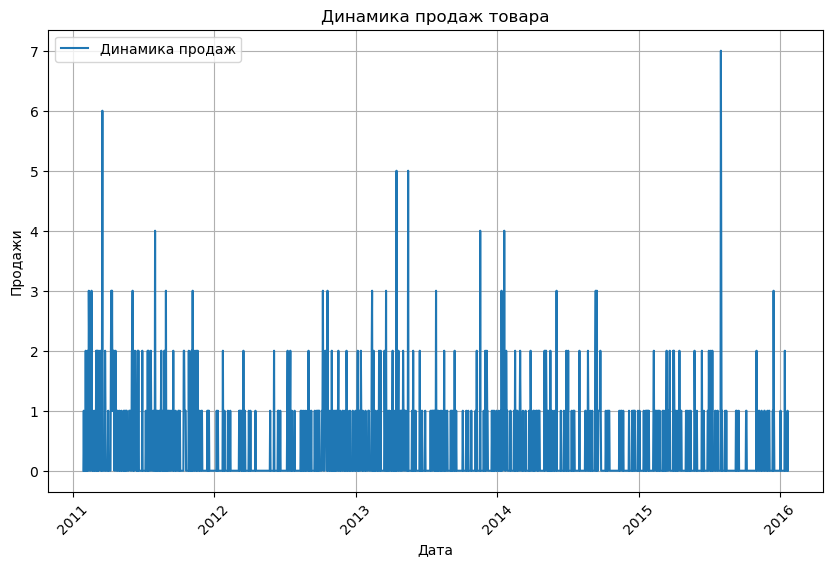

In [15]:
plot_sales(dates, sales)

### 3.2 Скорость продажи товара (изменение продаж по дням

In [16]:
# Функция для построения графика скорости продаж
def plot_speed_sales(dates, speed_sales):
    plt.figure(figsize=(10, 6))
    plt.bar(dates, speed_sales, label='Скорость продаж', color='orange')
    plt.xlabel('Дата')
    plt.ylabel('Скорость продаж')
    plt.title('Скорость продажи товара (изменение продаж по дням)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

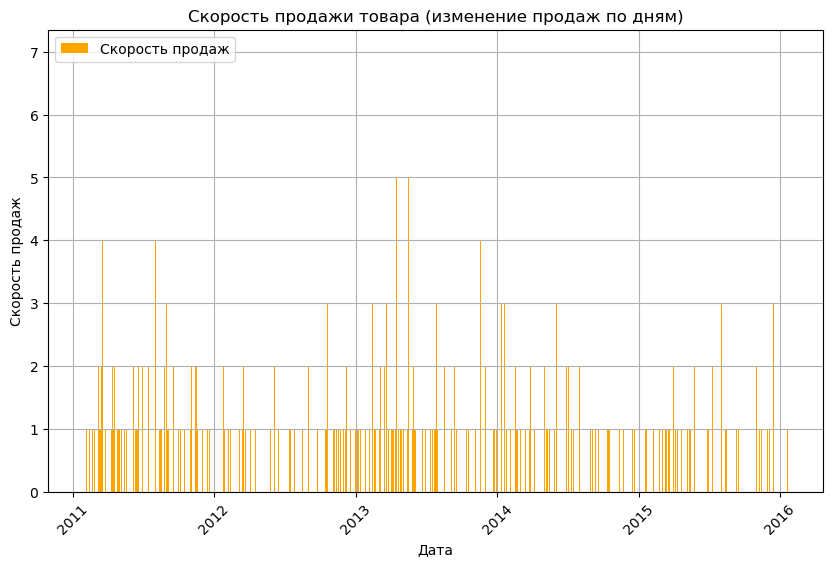

In [17]:
plot_speed_sales(dates, speed_sales)

### 3.3 Накопительные продажи

Накопительные продажи (или кумулятивные продажи) — это метод отображения общего объёма продаж, который постоянно увеличивается, добавляя количество проданных единиц за каждый период к предыдущим. Это означает, что на каждом шаге (например, каждый день, месяц или год) вы суммируете продажи с предыдущими периодами, чтобы получить общее количество продаж на данный момент.

In [18]:
# Функция для построения графика суммарных продаж
def plot_cumulative_sales(dates, cumulative_sales):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, cumulative_sales, label='Суммарные продажи', color='green')
    plt.xlabel('Дата')
    plt.ylabel('Накопительные продажи')
    plt.title('Накопительные продажи товара')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

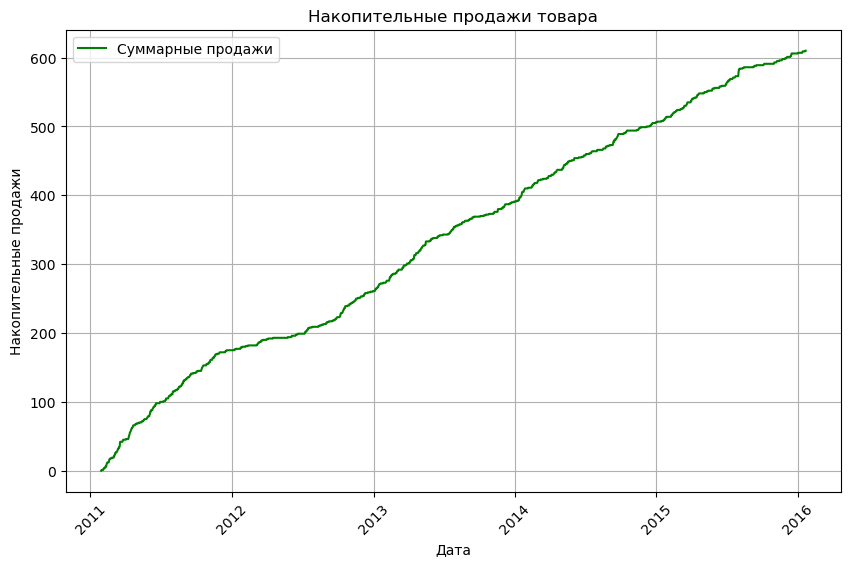

In [19]:
plot_cumulative_sales(dates, cumulative_sales)

### 3.4 Скорость продажи товара по выбрираемым интервалам

In [20]:
# Интерактивный график для изменения интервалов (по кварталам, месяцам, неделям)
def plot_sales_interactive(dates, sales, interval='M'):
    df = pd.DataFrame({'date': dates, 'sales': sales})
    df.set_index('date', inplace=True)
    df_resampled = df.resample(interval).sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(df_resampled['date'], df_resampled['sales'], color=['green' if x >= 0 else 'red' for x in df_resampled['sales']])
    
    ax.set_xlabel('Дата')
    ax.set_ylabel('Скорость продаж (единиц/квартал)')
    ax.set_title('Скорость продажи товара по кварталам')
    plt.xticks(rotation=45)
    
    # Настраиваем слайдер для выбора интервала
    ax_interval = plt.axes([0.2, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')
    slider = Slider(ax_interval, 'Интервал (M: месяц, Q: квартал, W: неделя)', 1, 3, valinit=1, valstep=1)
    
    def update(val):
        new_interval = 'M' if slider.val == 1 else ('Q' if slider.val == 2 else 'W')
        df_resampled = df.resample(new_interval).sum().reset_index()
        ax.clear()
        bars = ax.bar(df_resampled['date'], df_resampled['sales'], color=['green' if x >= 0 else 'red' for x in df_resampled['sales']])
        ax.set_xlabel('Дата')
        ax.set_ylabel('Скорость продаж (единиц/квартал)')
        ax.set_title(f'Скорость продажи товара по {new_interval}')
        plt.xticks(rotation=45)
        fig.canvas.draw_idle()

    slider.on_changed(update)
    
    plt.show()

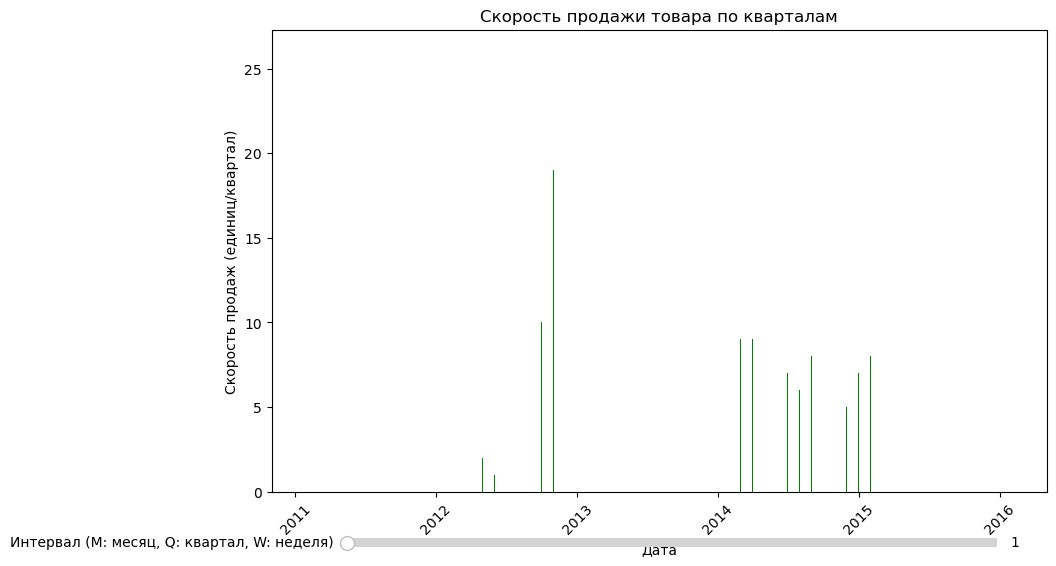

In [21]:
plot_sales_interactive(dates, sales, interval='ME')

### 3.5 Динамика продажи товара по выбираемым интервалам
отличие UI - ручками вводить значения

In [22]:
# Интерактивный график для изменения интервалов и выбора отрезка дат
def plot_sales_interactive_console(dates, sales):
    # Запрос интервала у пользователя
    interval = input('Введите интервал (M: месяц, Q: квартал, W: неделя): ').strip().upper()
    
    if interval not in ['M', 'Q', 'W']:
        print('Неверный интервал. Пожалуйста, введите M, Q или W.')
        return
    
    # Запрос периода у пользователя
    start_date = input('Введите начальную дату (в формате YYYY-MM-DD): ')
    end_date = input('Введите конечную дату (в формате YYYY-MM-DD): ')
    
    # Преобразуем введённые даты
    try:
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
    except ValueError:
        print('Неверный формат даты. Пожалуйста, введите дату в формате YYYY-MM-DD.')
        return
    
    # Фильтрация данных по введённому периоду
    df = pd.DataFrame({'date': dates, 'sales': sales})
    df['date'] = pd.to_datetime(df['date'])
    df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    if df_filtered.empty:
        print('Нет данных для выбранного периода.')
        return
    
    # Агрегация данных по выбранному интервалу
    df_filtered.set_index('date', inplace=True)
    df_resampled = df_filtered.resample(interval).sum().reset_index()
    
    # Строим график
    plt.figure(figsize=(10, 6))
    plt.bar(df_resampled['date'], df_resampled['sales'], color=['green' if x >= 0 else 'red' for x in df_resampled['sales']])
    
    plt.xlabel('Дата')
    plt.ylabel('Продажи')
    plt.title(f'Продажи товара по {interval} (с {start_date.date()} по {end_date.date()})')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

Введите интервал (M: месяц, Q: квартал, W: неделя):  M
Введите начальную дату (в формате YYYY-MM-DD):  2011-01-01
Введите конечную дату (в формате YYYY-MM-DD):  2011-04-01


C:\Users\Anastasia\AppData\Local\Temp\ipykernel_8144\113815169.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df_filtered.resample(interval).sum().reset_index()


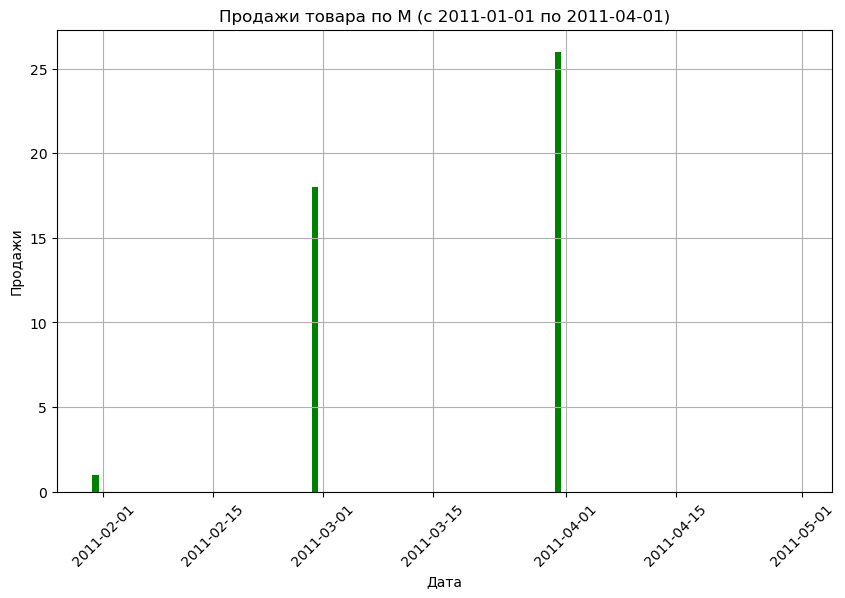

In [23]:
plot_sales_interactive_console(dates, sales)

### 3.6 Скорость продаж (относительно предыдущего показателя)

In [32]:
# Функция для построения графика
def plot_sales_chart(dates, sales, title):
    plt.figure(figsize=(12, 6))
    plt.plot(dates, sales, marker='o', linestyle='-', color='b')
    
    # Добавление меток на точки
    for i, sale in enumerate(sales):
        plt.text(dates[i], sale, f'{sale:.1f}', fontsize=9, ha='center', va='bottom' if sale >= 0 else 'top', color='black')

    plt.title(title)
    plt.xlabel('Дата')
    plt.ylabel('Количество продаж')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [33]:
# Ввод данных от пользователя
def user_input():
    year = input("Введите год, за который хотите посмотреть данные: ")
    mode = input("Введите 'M' для отображения данных по месяцам или 'W' для отображения по неделям: ").upper()
    
    return int(year), mode

In [34]:
# Основная функция
def main():
    # Получение ввода от пользователя
    year, period = user_input()
    
    # Фильтрация данных по выбранному году
    filtered_data = data[data['year'] == year]
    
    # Агрегация по выбранному периоду (месяц или неделя)
    if period == 'M':
        title = f'График продаж за {year} по месяцам'
        period = 'MS'  # Используем 'MS' вместо 'M'
    elif period == 'W':
        title = f'График продаж за {year} по неделям'
        period = 'W'
    
    # Получение данных через пайплайн (забираем только агрегированные данные)
    _, _, _, processed_dates, sales = unified_sales_pipeline(filtered_data['date'], filtered_data['cnt'], period=period)
    
    # Построение графика на основе данных
    plot_sales_chart(processed_dates, sales, title)

Введите год, за который хотите посмотреть данные:  2012
Введите 'M' для отображения данных по месяцам или 'W' для отображения по неделям:  M


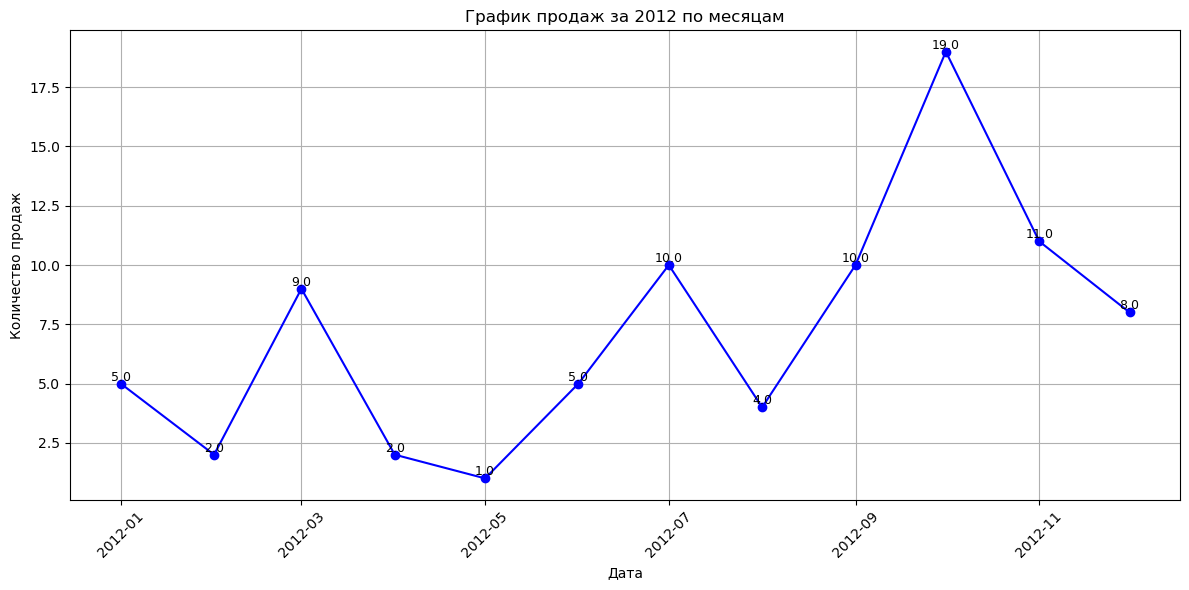

In [35]:
main()

### 3.7 Скорость продажи товара по выборному периоду относительно предыдущего показателя

In [40]:
data['date'] = pd.to_datetime(data['date'])

In [55]:
# Функция для создания агрегированных данных по продажам и расчёта скорости с использованием скользящего окна
def sales_speed_pipeline_moving_average(dates_list, sales_list, period='QS'):
    # Преобразуем даты в DateTime и работаем с ними
    data = pd.DataFrame({'Date': dates_list, 'Sales': sales_list})
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    
    # Агрегация по выбранному периоду (месяц, квартал, год)
    resampled_data = data.resample(period).sum()
    
    # Вычисление изменений относительно предыдущего значения (скользящее окно)
    resampled_data['Sales_Change'] = resampled_data['Sales'].diff()
    
    # Возвращаем данные с одинаковой длиной
    return resampled_data.index, resampled_data['Sales_Change']

In [56]:
# Функция для построения столбчатого графика
def plot_sales_bar_chart(dates, sales_speed):
    # Проверяем, совпадают ли длины массивов
    if len(dates) != len(sales_speed):
        print(f"Ошибка: количество дат ({len(dates)}) не совпадает с количеством значений скорости продаж ({len(sales_speed)}).")
        return
    
    plt.figure(figsize=(10, 6))
    
    # Задаем цвета для положительных и отрицательных изменений
    colors = ['g' if speed >= 0 else 'r' for speed in sales_speed]
    
    # Построение столбчатого графика
    plt.bar(dates, sales_speed, color=colors, width=80, align='center')
    
    # Добавление меток на столбцы
    for i, speed in enumerate(sales_speed):
        if pd.notna(speed):  # Проверяем, что значение не NaN
            plt.text(dates[i], speed, f'{speed:.1f}', fontsize=9, ha='center', va='bottom' if speed >= 0 else 'top', color='black')
    
    # Настройка графика
    plt.title("Скорость продажи товара по кварталам с использованием скользящего окна")
    plt.xlabel('Дата')
    plt.ylabel('Изменение скорости продаж (единиц/квартал)')
    plt.grid(True, axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [57]:
# Функция для пользовательского ввода данных
def user_input():
    start_date = input("Введите начальную дату в формате YYYY-MM-DD: ")
    end_date = input("Введите конечную дату в формате YYYY-MM-DD: ")
    
    # Преобразуем строки в формат дат
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Выбор периода агрегации (например, М - для месяцев, QS - для кварталов, A - для годов)
    period = input("Введите период агрегации (например, 'M' для месяцев, 'QS' для кварталов, 'A' для годов): ").upper()
    
    return start_date, end_date, period

In [58]:
# Основная функция
def main():
    # Получаем данные от пользователя
    start_date, end_date, period = user_input()

    # Фильтрация данных по выбранному периоду
    filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    
    # Получение данных через пайплайн с использованием скользящего окна
    processed_dates, sales_speed = sales_speed_pipeline_moving_average(filtered_data['date'], filtered_data['cnt'], period=period)
    
    # Проверяем длину массивов перед построением графика
    plot_sales_bar_chart(processed_dates, sales_speed)

Введите начальную дату в формате YYYY-MM-DD:  2011-01-01
Введите конечную дату в формате YYYY-MM-DD:  2013-01-01
Введите период агрегации (например, 'M' для месяцев, 'QS' для кварталов, 'A' для годов):  Q


C:\Users\Anastasia\AppData\Local\Temp\ipykernel_8144\1976128750.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resampled_data = data.resample(period).sum()


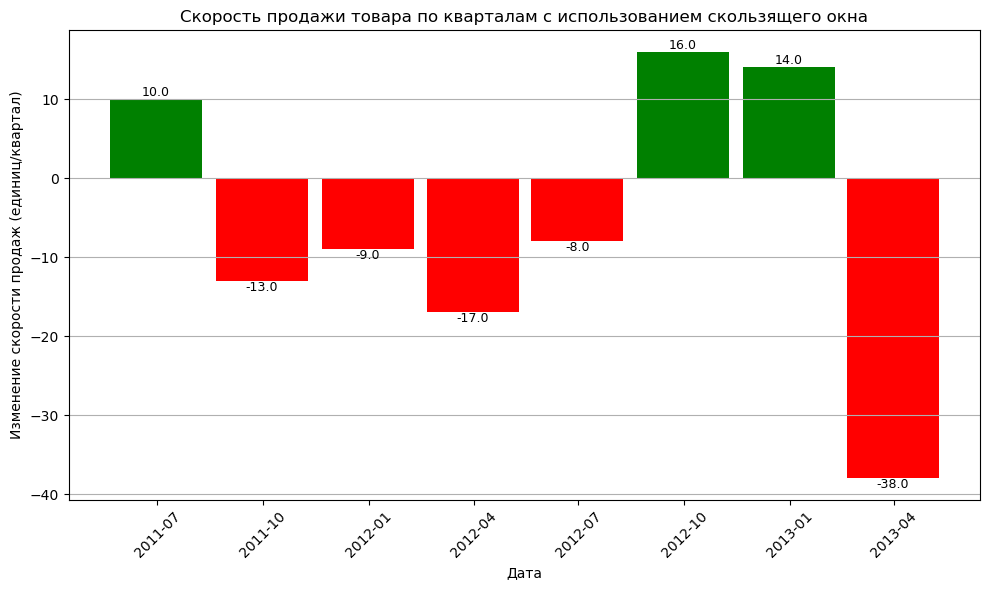

In [59]:
main()

### 3.8 Скорость продажи товара по выборному периоду 

In [64]:
data['date'] = pd.to_datetime(data['date'])

In [77]:
# Функция для создания агрегированных данных по продажам
def sales_speed_pipeline(dates_list, sales_list, period='Q'):
    # Преобразуем даты в DateTime и работаем с ними
    data = pd.DataFrame({'Date': dates_list, 'Sales': sales_list})
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    
    # Агрегация по выбранному периоду (месяц, квартал, год)
    resampled_data = data.resample(period).sum()

    return resampled_data.index, resampled_data['Sales']

In [78]:
# Функция для построения столбчатого графика
def plot_sales_bar_chart(dates, sales_speed):
    plt.figure(figsize=(10, 6))
    
    # Задаем цвета для положительных и отрицательных изменений
    colors = ['g' if speed >= 0 else 'r' for speed in sales_speed]
    
    # Построение столбчатого графика
    plt.bar(dates, sales_speed, color=colors, width=80, align='center')
    
    # Добавление меток на столбцы
    for i, speed in enumerate(sales_speed):
        plt.text(dates[i], speed, f'{speed:.1f}', fontsize=9, ha='center', va='bottom' if speed >= 0 else 'top', color='black')
    
    # Настройка графика
    plt.title("Скорость продажи товара по кварталам")
    plt.xlabel('Дата')
    plt.ylabel('Скорость продаж (единиц/квартал)')
    plt.grid(True, axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [79]:
# Функция для пользовательского ввода данных
def user_input():
    start_date = input("Введите начальную дату в формате YYYY-MM-DD: ")
    end_date = input("Введите конечную дату в формате YYYY-MM-DD: ")
    
    # Преобразуем строки в формат дат
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Выбор периода агрегации (например, М - для месяцев, Q - для кварталов, A - для годов)
    period = input("Введите период агрегации (например, 'M' для месяцев, 'Q' для кварталов, 'A' для годов): ").upper()
    
    return start_date, end_date, period

In [80]:
# Основная функция
def main():
    # Получаем данные от пользователя
    start_date, end_date, period = user_input()

    # Фильтрация данных по выбранному периоду
    filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    
    # Генерация данных на основе выбранного пользователем периода
    processed_dates, sales_speed = sales_speed_pipeline(filtered_data['date'], filtered_data['cnt'], period)
    
    # Построение графика на основе данных
    plot_sales_bar_chart(processed_dates, sales_speed)

Введите начальную дату в формате YYYY-MM-DD:  2011-01-01
Введите конечную дату в формате YYYY-MM-DD:  2013-01-01
Введите период агрегации (например, 'M' для месяцев, 'Q' для кварталов, 'A' для годов):  Q


C:\Users\Anastasia\AppData\Local\Temp\ipykernel_8144\859857149.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resampled_data = data.resample(period).sum()


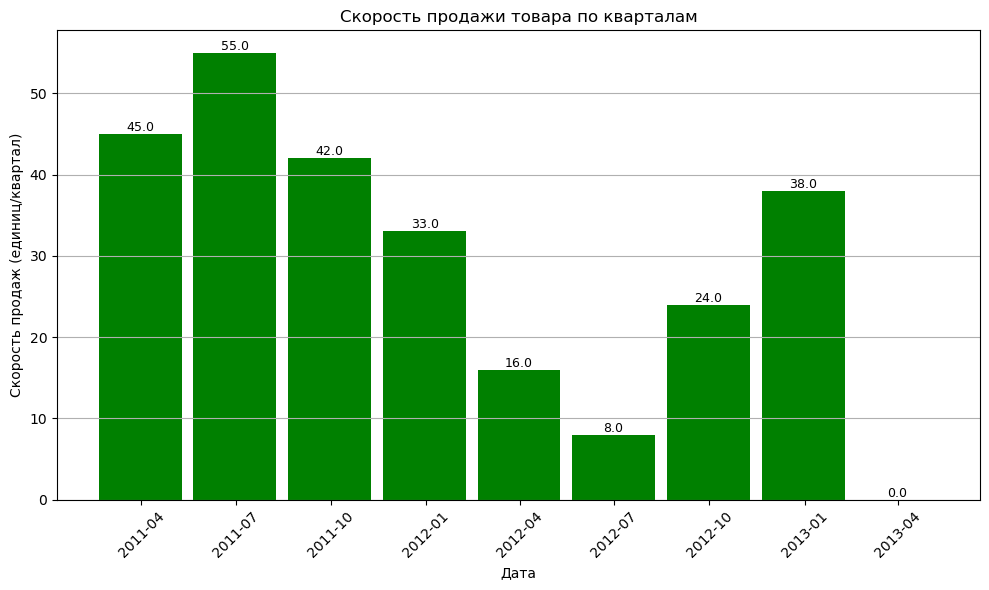

In [81]:
main()

## 4. Пики продаж (месяц)

In [92]:
data['date'] = pd.to_datetime(data['date'])

In [89]:
# Функция для расчета пиков продаж по месяцам
def sales_peaks_pipeline(dates, sales, period='M'):
    # Преобразуем даты и продажи в pandas DataFrame
    data = pd.DataFrame({'Date': dates, 'Sales': sales})
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Устанавливаем 'Date' как индекс для работы с временными рядами
    data.set_index('Date', inplace=True)
    
    # Ресемплируем данные по месяцам и находим максимальные продажи за месяц
    monthly_peaks = data.resample(period).max()
    
    # Возвращаем месяцы и пики продаж
    return monthly_peaks.index, monthly_peaks['Sales']

### 4.1  Диаграмма с накоплением (Area Chart) — по годам сетка

In [90]:
# Функция для построения диаграммы с накоплением по годам в сетке (Area Chart)
def plot_sales_peaks_area_grid(dates, sales_peaks):
    # Преобразуем даты и пики продаж в pandas DataFrame для удобства фильтрации по годам
    data = pd.DataFrame({'Date': dates, 'Sales': sales_peaks})
    data['Year'] = data['Date'].dt.year
    unique_years = data['Year'].unique()
    
    # Определяем количество строк и столбцов для сетки (2x3)
    rows, cols = 2, 3
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    
    # Убираем лишние оси, если лет меньше 6
    axes = axes.flatten()
    for ax in axes[len(unique_years):]:
        ax.set_visible(False)
    
    # Построение графиков по годам
    for i, year in enumerate(unique_years):
        yearly_data = data[data['Year'] == year]
        axes[i].fill_between(yearly_data['Date'], yearly_data['Sales'], color='b', alpha=0.3)
        axes[i].plot(yearly_data['Date'], yearly_data['Sales'], marker='o', color='b')
        
        # Добавление меток на график
        for j, peak in enumerate(yearly_data['Sales']):
            axes[i].text(yearly_data['Date'].iloc[j], peak, f'{peak:.1f}', fontsize=9, ha='right', va='bottom')
        
        # Настройка каждого графика
        axes[i].set_title(f'Пики продаж за {year}')
        axes[i].set_xlabel('Месяц')
        axes[i].set_ylabel('Максимальные продажи (единиц/месяц)')
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

In [93]:
# Основная функция
def main():
    # Получаем данные от пользователя
    start_date = input("Введите начальную дату в формате YYYY-MM-DD: ")
    end_date = input("Введите конечную дату в формате YYYY-MM-DD: ")
    
    # Преобразуем строки в формат дат
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Фильтрация данных по выбранному периоду
    filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    
    # Вызов пайплайна для расчета пиков продаж по месяцам
    processed_dates, monthly_peaks = sales_peaks_pipeline(filtered_data['date'], filtered_data['cnt'], period='M')
    
    # Построение диаграммы с накоплением по годам
    plot_sales_peaks_area_grid(processed_dates, monthly_peaks)

Введите начальную дату в формате YYYY-MM-DD:  2011-01-01
Введите конечную дату в формате YYYY-MM-DD:  2016-01-01


C:\Users\Anastasia\AppData\Local\Temp\ipykernel_8144\4111577365.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_peaks = data.resample(period).max()


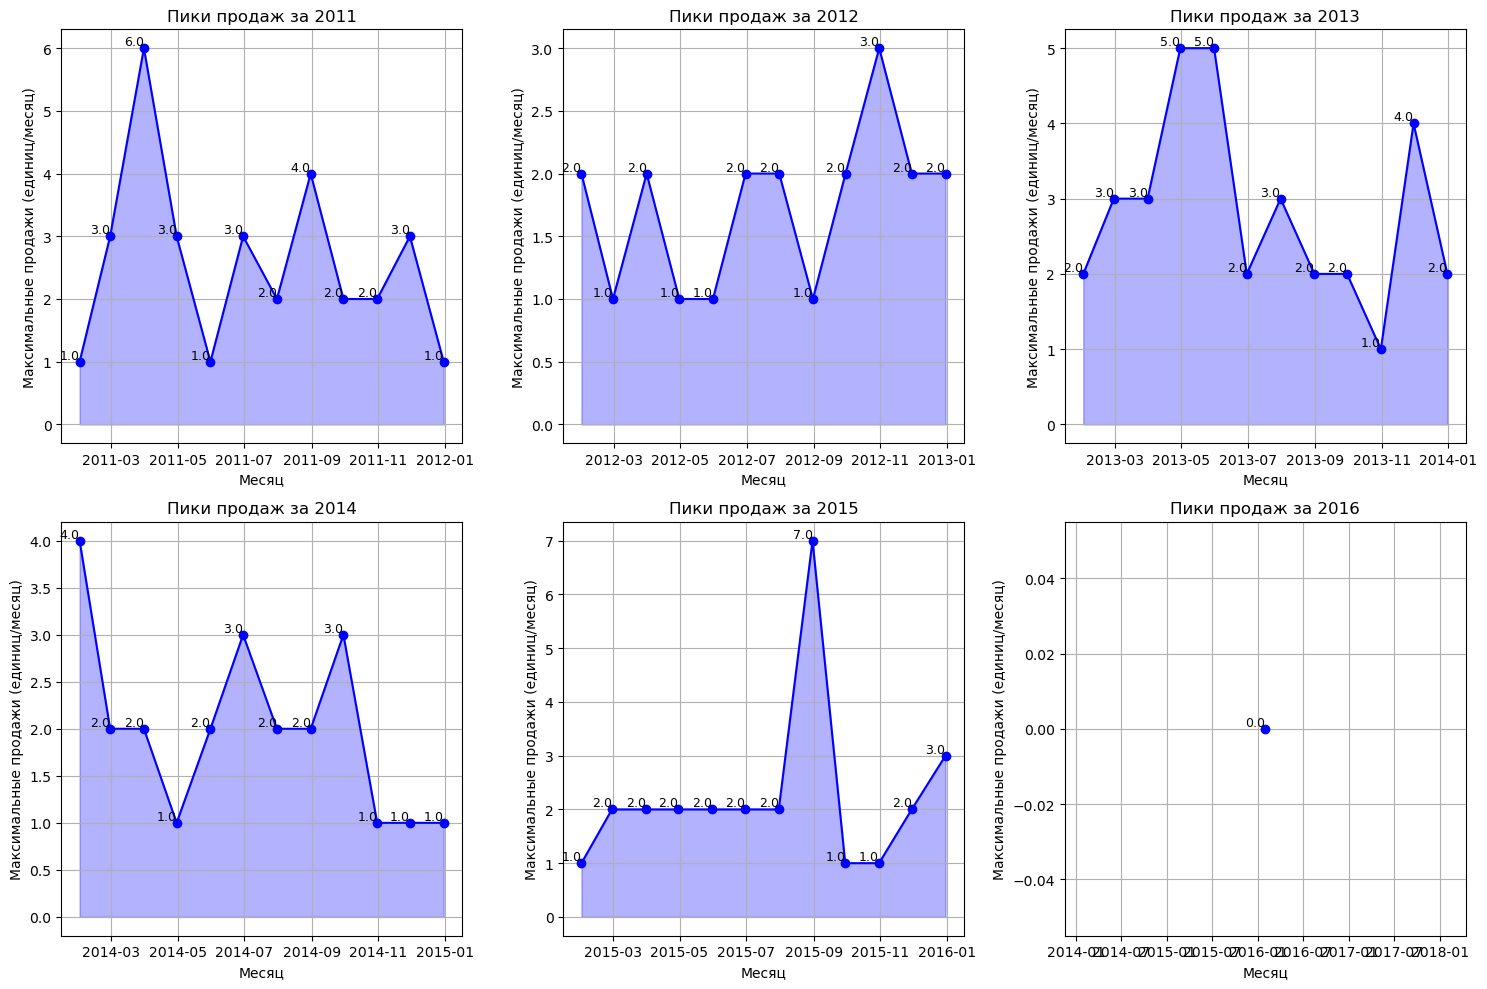

In [96]:
main()

### 4.2 Круговая диаграмма (Pie Chart) — по годам сетка

In [106]:
# Функция для построения круговой диаграммы пиков продаж по годам в сетке 2x3
def plot_sales_peaks_pie_grid(dates, sales_peaks):
    # Преобразуем даты и пики продаж в pandas DataFrame для удобства фильтрации по годам
    data = pd.DataFrame({'Date': dates, 'Sales': sales_peaks})
    data['Year'] = data['Date'].dt.year
    unique_years = data['Year'].unique()
    
    # Определяем количество строк и столбцов для сетки (2x3)
    rows, cols = 2, 3
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    
    # Убираем лишние оси, если лет меньше 6
    axes = axes.flatten()
    for ax in axes[len(unique_years):]:
        ax.set_visible(False)
    
    # Построение круговых диаграмм по годам
    for i, year in enumerate(unique_years):
        yearly_data = data[data['Year'] == year]
        # Исключаем нулевые и пустые значения
        yearly_data = yearly_data.dropna(subset=['Sales'])
        if not yearly_data.empty and yearly_data['Sales'].sum() > 0:  # Проверяем наличие данных
            # Круговая диаграмма для каждого года
            axes[i].pie(yearly_data['Sales'], labels=[date.strftime('%b') for date in yearly_data['Date']], 
                        autopct='%1.1f%%', startangle=90)
            axes[i].set_title(f'Пики продаж за {year}')
    
    plt.tight_layout()
    plt.show()

In [107]:
# Функция для расчета пиков продаж по месяцам
def sales_peaks_pipeline(dates, sales, period='MS'):  # Заменяем 'M' на 'MS'
    # Преобразуем даты и продажи в pandas DataFrame
    data = pd.DataFrame({'Date': dates, 'Sales': sales})
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Устанавливаем 'Date' как индекс для работы с временными рядами
    data.set_index('Date', inplace=True)
    
    # Ресемплируем данные по месяцам и находим максимальные продажи за месяц
    monthly_peaks = data.resample(period).max()
    
    # Возвращаем месяцы и пики продаж
    return monthly_peaks.index, monthly_peaks['Sales']

In [108]:
# Основная функция
def main():
    # Получаем данные от пользователя
    start_date = input("Введите начальную дату в формате YYYY-MM-DD: ")
    end_date = input("Введите конечную дату в формате YYYY-MM-DD: ")
    
    # Преобразуем строки в формат дат
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Фильтрация данных по выбранному периоду
    filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    
    # Вызов пайплайна для расчета пиков продаж по месяцам
    processed_dates, monthly_peaks = sales_peaks_pipeline(filtered_data['date'], filtered_data['cnt'], period='MS')
    
    # Построение круговой диаграммы по годам
    plot_sales_peaks_pie_grid(processed_dates, monthly_peaks)

Введите начальную дату в формате YYYY-MM-DD:  2011-01-01
Введите конечную дату в формате YYYY-MM-DD:  2016-01-01


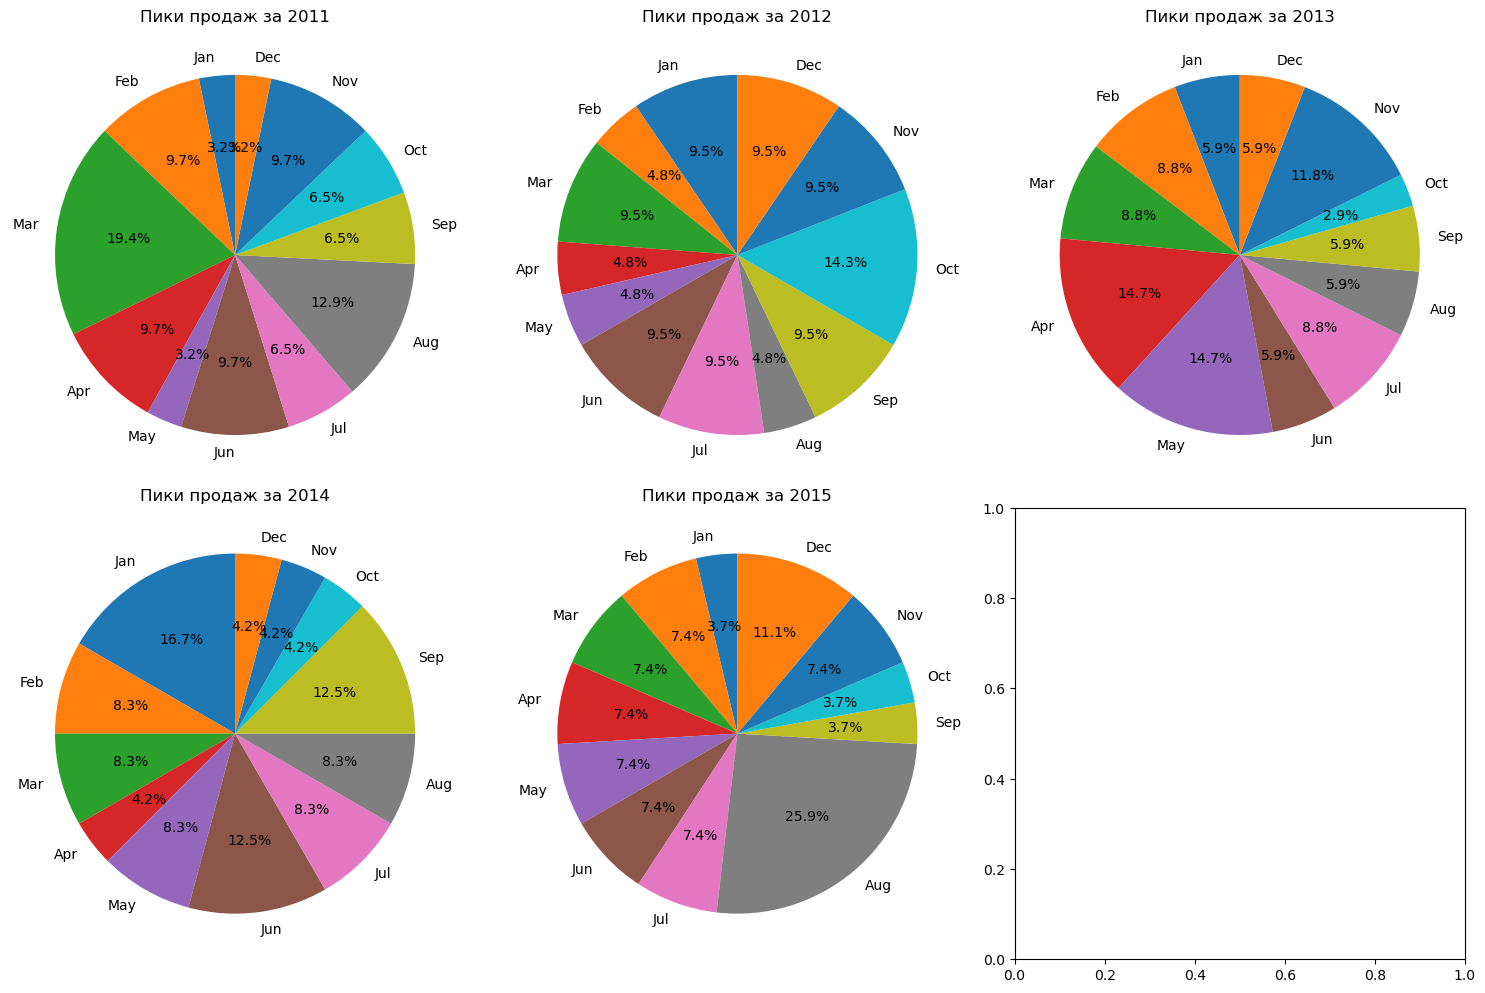

In [109]:
main()

### 4.3 Обычный

In [111]:
# Функция для построения обычного графика пиков продаж
def plot_sales_peaks(dates, sales_peaks):
    plt.figure(figsize=(10, 6))
    
    # Построение линейного графика пиков продаж
    plt.plot(dates, sales_peaks, marker='o', linestyle='-', color='b')
    
    # Добавляем метки на график
    for i, peak in enumerate(sales_peaks):
        plt.text(dates[i], peak, f'{peak:.1f}', fontsize=9, ha='right', va='bottom')
    
    # Настройка графика
    plt.title('Пики продаж (месяц)')
    plt.xlabel('Дата')
    plt.ylabel('Максимальные продажи (единиц/месяц)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [113]:
# Основная функция для построения графика
def main():
    # Фильтрация данных по выбранному периоду
    start_date = '2011-01-01'  # Задайте свои даты
    end_date = '2016-01-01'
    
    filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    
    # Получение пиков продаж
    processed_dates, monthly_peaks = sales_peaks_pipeline(filtered_data['date'], filtered_data['cnt'], period='MS')
    
    # Построение линейного графика пиков продаж
    plot_sales_peaks(processed_dates, monthly_peaks)

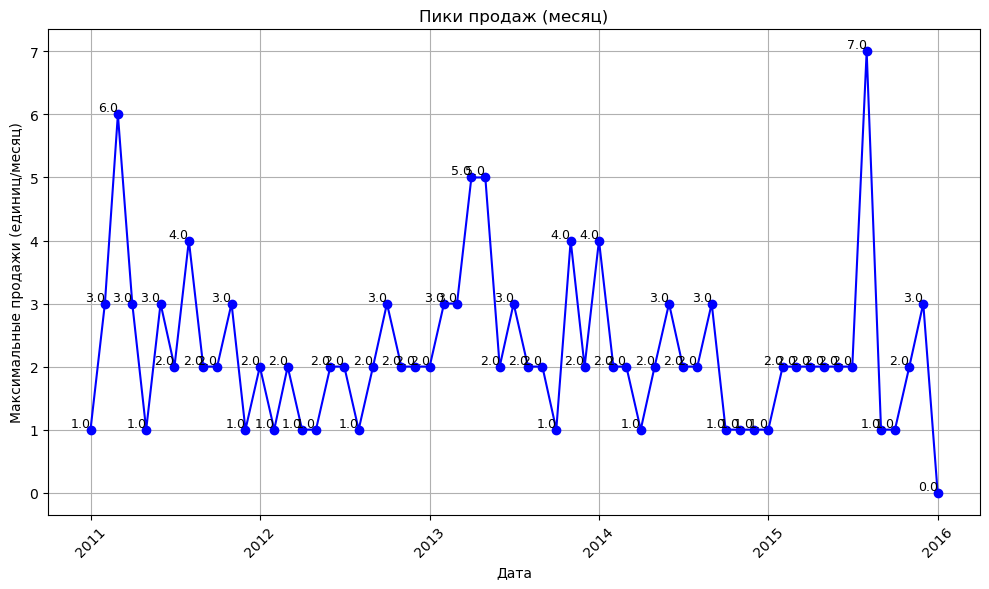

In [114]:
main()

### 4.4 Столбчатый график

In [115]:
# Функция для построения столбчатого графика пиков продаж
def plot_sales_peaks_bar(dates, sales_peaks):
    plt.figure(figsize=(10, 6))
    
    # Построение столбчатого графика пиков продаж
    plt.bar(dates, sales_peaks, color='b', width=28)
    
    # Добавляем метки на столбцы
    for i, peak in enumerate(sales_peaks):
        plt.text(dates[i], peak, f'{peak:.1f}', fontsize=9, ha='center', va='bottom')
    
    # Настройка графика
    plt.title('Пики продаж по месяцам')
    plt.xlabel('Дата')
    plt.ylabel('Максимальные продажи (единиц/месяц)')
    plt.grid(True, axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [116]:
# Функция для расчета пиков продаж по месяцам
def sales_peaks_pipeline(dates, sales, period='MS'):
    # Преобразуем даты и продажи в pandas DataFrame
    data = pd.DataFrame({'Date': dates, 'Sales': sales})
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Устанавливаем 'Date' как индекс для работы с временными рядами
    data.set_index('Date', inplace=True)
    
    # Ресемплируем данные по месяцам и находим максимальные продажи за месяц
    monthly_peaks = data.resample(period).max()
    
    # Возвращаем месяцы и пики продаж
    return monthly_peaks.index, monthly_peaks['Sales']

In [117]:
# Основная функция для построения графика
def main():
    # Фильтрация данных по выбранному периоду
    start_date = '2011-01-01'  # Задайте свои даты
    end_date = '2016-01-01'
    
    filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    
    # Получение пиков продаж
    processed_dates, monthly_peaks = sales_peaks_pipeline(filtered_data['date'], filtered_data['cnt'], period='MS')
    
    # Построение столбчатого графика пиков продаж
    plot_sales_peaks_bar(processed_dates, monthly_peaks)

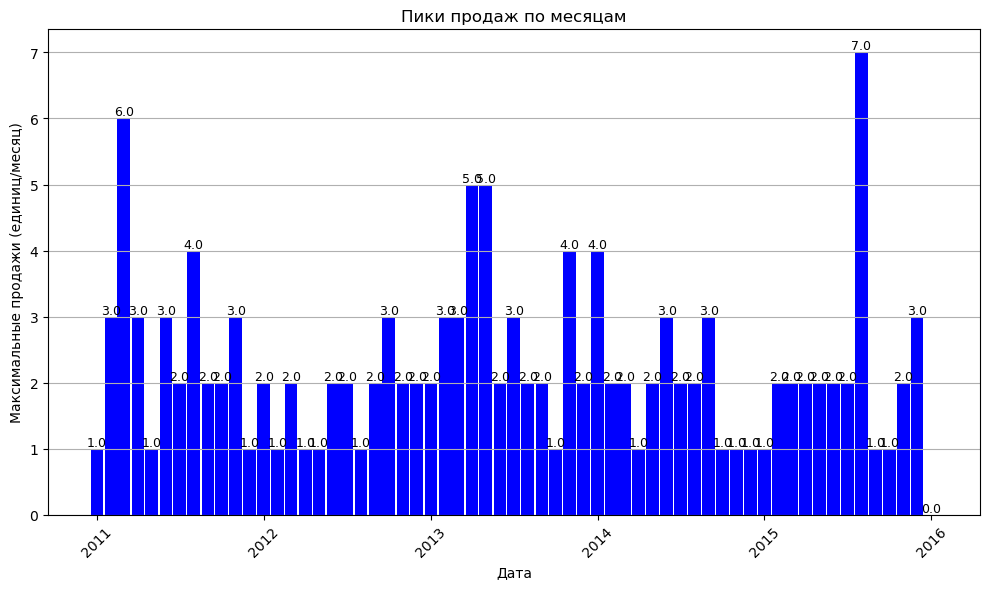

In [118]:
main()

### 4.4 Каждый график представляет пики продаж для одного года по выбранным месяцам

In [122]:
# Функция для построения графиков пиков продаж по годам в сетке
def plot_sales_peaks_year_grid(dates, sales_peaks, unique_years, months_range):
    # Преобразуем даты и пики продаж в pandas DataFrame для удобства фильтрации по годам и месяцам
    data = pd.DataFrame({'Date': dates, 'Sales': sales_peaks})
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    
    # Определяем количество строк и столбцов для сетки (2x3)
    rows, cols = (len(unique_years) // 3) + 1, 3
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()

    # Построение графиков по годам
    for i, year in enumerate(unique_years):
        yearly_data = data[(data['Year'] == year) & (data['Month'].between(months_range[0], months_range[1]))]
        if not yearly_data.empty:
            axes[i].plot(yearly_data['Date'], yearly_data['Sales'], marker='o', linestyle='-', color='b')
            
            # Добавляем метки на график
            for j, peak in enumerate(yearly_data['Sales']):
                axes[i].text(yearly_data['Date'].iloc[j], peak, f'{peak:.1f}', fontsize=9, ha='center', va='bottom')
            
            # Настройка каждого графика
            axes[i].set_title(f'Пики продаж за {year}')
            axes[i].set_xlabel('Месяц')
            axes[i].set_ylabel('Максимальные продажи (единиц/месяц)')
            axes[i].grid(True)
            axes[i].set_xticks(pd.date_range(f'{year}-{months_range[0]:02d}', f'{year}-{months_range[1]:02d}', freq='M'))
            axes[i].tick_params(axis='x', rotation=45)

    # Удаление пустых графиков, если не хватает данных
    for ax in axes[len(unique_years):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

In [123]:
# Функция для ввода диапазона месяцев и годов
def user_input():
    start_year = int(input("Введите начальный год: "))
    end_year = int(input("Введите конечный год: "))
    start_month = int(input("Введите начальный месяц (1-12): "))
    end_month = int(input("Введите конечный месяц (1-12): "))
    
    return start_year, end_year, start_month, end_month

In [124]:
# Основная функция для построения графика
def main():
    # Получаем данные от пользователя
    start_year, end_year, start_month, end_month = user_input()
    
    # Фильтрация данных по выбранному периоду
    filtered_data = data[(data['date'].dt.year >= start_year) & (data['date'].dt.year <= end_year)]
    
    # Получение пиков продаж
    processed_dates, monthly_peaks = sales_peaks_pipeline(filtered_data['date'], filtered_data['cnt'], period='MS')
    
    # Получаем уникальные годы для сетки
    unique_years = filtered_data['date'].dt.year.unique()
    
    # Построение сетки графиков с диапазоном месяцев
    plot_sales_peaks_year_grid(processed_dates, monthly_peaks, unique_years, (start_month, end_month))


Введите начальный год:  2011
Введите конечный год:  2016
Введите начальный месяц (1-12):  5
Введите конечный месяц (1-12):  7


C:\Users\Anastasia\AppData\Local\Temp\ipykernel_8144\2267359970.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  axes[i].set_xticks(pd.date_range(f'{year}-{months_range[0]:02d}', f'{year}-{months_range[1]:02d}', freq='M'))


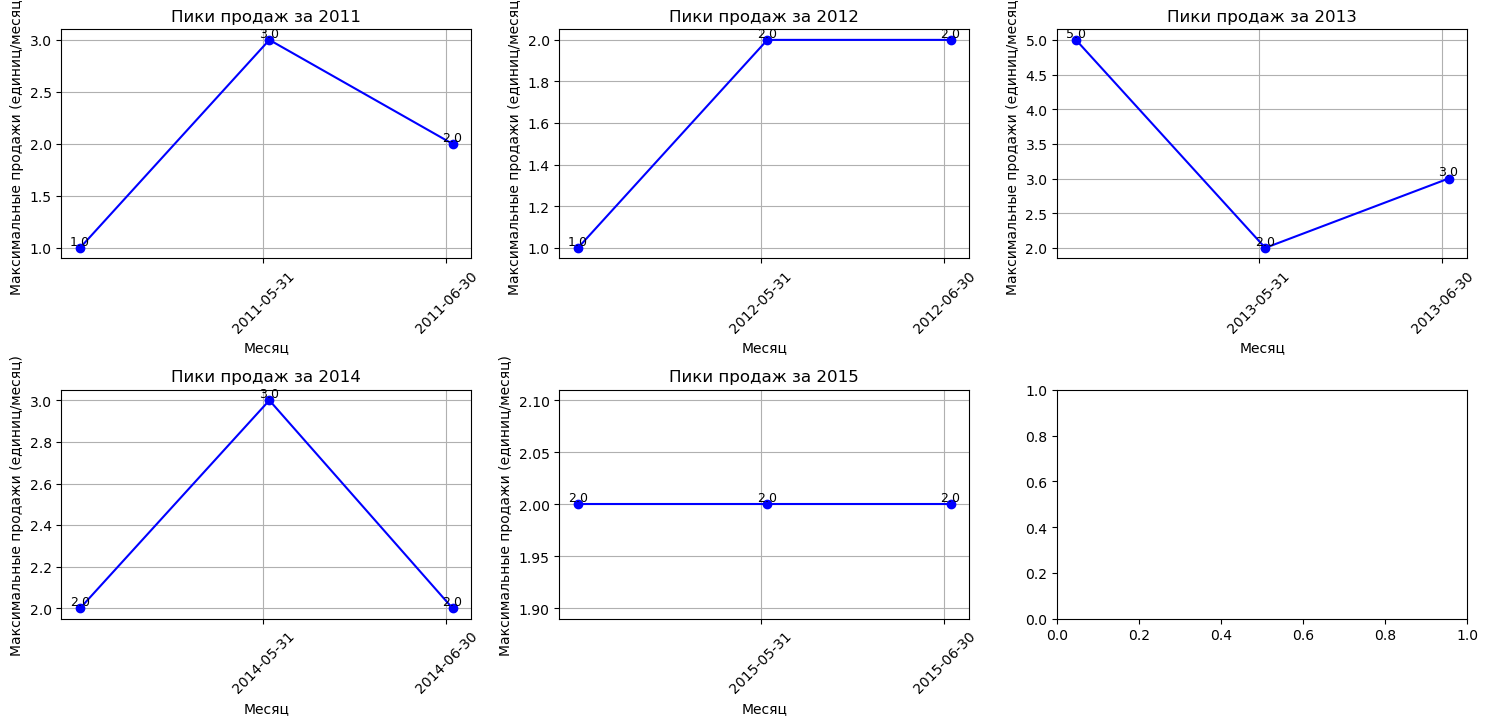

In [125]:
main()

### 4.5 Интерактивный по годам месяцам и неделям (в разрезе месяца можно посмотреть на все 12 месяцев в определённом выбраном году, в разрезе недели можно посмотреть 4 недели выбранного года и месяца)

In [139]:
# Функция для построения графиков пиков продаж по неделям в месяце
def plot_sales_by_weeks_in_month(dates, sales, month):
    data = pd.DataFrame({'Date': dates, 'Sales': sales})
    data['Week'] = data['Date'].dt.isocalendar().week  # Используем isocalendar для получения недели
    data['Day'] = data['Date'].dt.day
    data['Month'] = data['Date'].dt.month
    
    weeks = data[data['Month'] == month].groupby('Week')
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Сетка 2 на 2
    axes = axes.flatten()

    for i, (week, week_data) in enumerate(weeks):
        if i < len(axes):  # Проверяем, чтобы не выйти за границы осей
            axes[i].plot(week_data['Date'], week_data['Sales'], marker='o', linestyle='-', color='b')
            axes[i].set_title(f'Неделя {week}')
            axes[i].set_xlabel('Дни')
            axes[i].set_ylabel('Продажи')
            axes[i].grid(True)
            axes[i].tick_params(axis='x', rotation=45)
    
    # Убираем неиспользованные оси
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
        
    plt.tight_layout()
    plt.show()

In [140]:
# Функция для построения графиков пиков продаж по месяцам в сетке 3x4
def plot_sales_by_month(dates, sales, year):
    data = pd.DataFrame({'Date': dates, 'Sales': sales})
    data['Month'] = data['Date'].dt.month
    
    months = data[data['Date'].dt.year == year].groupby('Month')
    
    fig, axes = plt.subplots(3, 4, figsize=(18, 10))  # Сетка 3 на 4
    axes = axes.flatten()

    for i, (month, month_data) in enumerate(months):
        weeks = month_data.groupby(month_data['Date'].dt.isocalendar().week)
        for week, week_data in weeks:
            axes[i].plot(week_data['Date'], week_data['Sales'], marker='o', linestyle='-', color='b')
        axes[i].set_title(f'Месяц {month}')
        axes[i].set_xlabel('Недели')
        axes[i].set_ylabel('Продажи')
        axes[i].grid(True)
        axes[i].tick_params(axis='x', rotation=45)
        
    plt.tight_layout()
    plt.show()

In [141]:
# Функция для пользовательского выбора
def user_input():
    year = int(input("Введите год, за который хотите посмотреть данные: "))
    mode = input("Введите 'М' для отображения данных по месяцам или 'Н' для отображения по неделям: ").upper()
    
    return year, mode

In [142]:
# Основная функция
def main():
    # Получаем данные от пользователя
    year, mode = user_input()

    # Фильтрация данных по выбранному году
    filtered_data = data[data['date'].dt.year == year]
    
    # Получение пиков продаж
    processed_dates, monthly_peaks = sales_peaks_pipeline(filtered_data['date'], filtered_data['cnt'], period='D')
    
    if mode == 'М':
        plot_sales_by_month(processed_dates, monthly_peaks, year)
    elif mode == 'Н':
        month = int(input("Введите месяц (1-12): "))
        plot_sales_by_weeks_in_month(processed_dates, monthly_peaks, month)
    else:
        print("Неверный ввод. Пожалуйста, выберите 'М' или 'Н'.")

Введите год, за который хотите посмотреть данные:  2012
Введите 'М' для отображения данных по месяцам или 'Н' для отображения по неделям:  Н
Введите месяц (1-12):  6


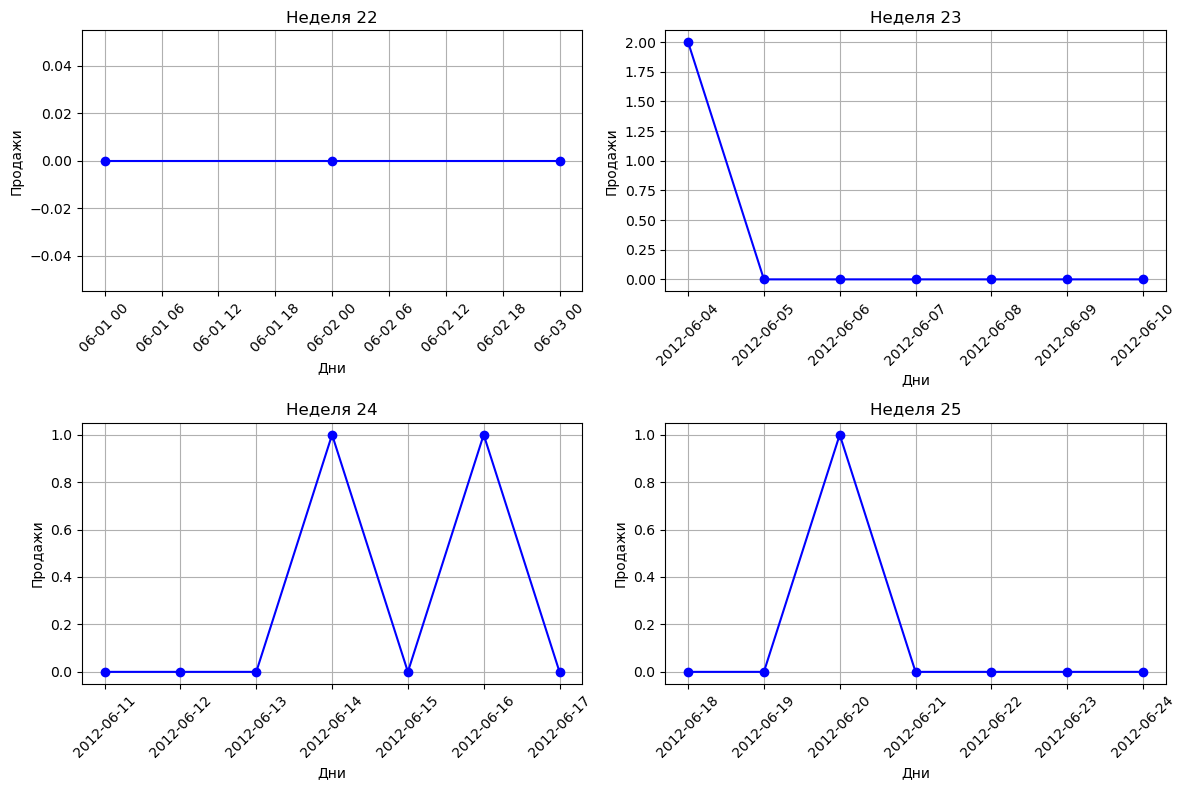

In [143]:
main()

## 5. Пики продаж (день)

Пайплайн для обработки данных: Пайплайн принимает готовые списки данных (в нашем случае даты и количество продаж) и производит необходимые расчёты (включая сглаживание, если нужно).

In [20]:
# Функция для пайплайна обработки данных
def sales_pipeline(dates_list, sales_list):
    data = pd.DataFrame({'Date': dates_list, 'Sales': sales_list})
    data.set_index('Date', inplace=True)
    return data

### 5.1 Интерактивный с выбором меясца и года

In [21]:
# Функция для построения графика пиков продаж по дням
def plot_sales_peaks(year, month, sales_data):
    # Фильтруем данные по выбранным году и месяцу
    filtered_data = sales_data[(sales_data.index.year == year) & (sales_data.index.month == month)]
    
    if filtered_data.empty:
        print(f"Нет данных для {year}-{month}.")
        return
    
    # Группируем данные по дням и считаем количество продаж
    daily_sales = filtered_data.groupby(filtered_data.index.day).sum()

    # Строим график
    plt.figure(figsize=(10, 6))
    plt.plot(daily_sales.index, daily_sales['Sales'], marker='o', linestyle='-', color='g')
    plt.title(f"Пики продаж по дням ({year}-{month})")
    plt.xlabel("День")
    plt.ylabel("Количество продаж")
    plt.grid(True)
    plt.xticks(daily_sales.index)
    plt.tight_layout()
    plt.show()

In [22]:
# Запрашиваем у пользователя год и месяц
year = int(input("Введите год (например, 2011): "))
month = int(input("Введите месяц (например, 1 для января): "))

Введите год (например, 2011):  2012
Введите месяц (например, 1 для января):  5


In [25]:
# Подготавливаем данные для пайплайна
dates_list = data['date'].tolist()
sales_list = data['cnt'].tolist()

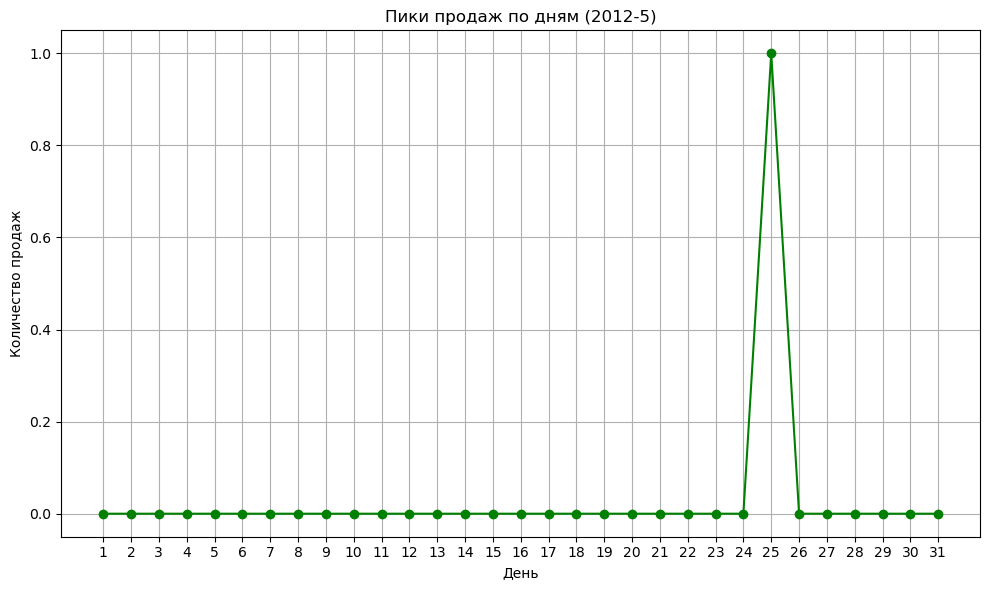

In [26]:
# Пропускаем данные через пайплайн
processed_data = sales_pipeline(dates_list, sales_list)

# Построение графика с реальными данными
plot_sales_peaks(year, month, processed_data)

### 5.2 С наложением интерактивный с выбором меясца и года

In [31]:
# Функция для построения графиков с наложением нескольких месяцев
def plot_sales_peaks_overlay_filled(year, months, sales_data):
    plt.figure(figsize=(10, 6))
    
    colors = plt.cm.get_cmap('tab10')  # Используем палитру цветов для графиков
    
    for i, month in enumerate(months):
        # Фильтруем данные по выбранным году и месяцу
        filtered_data = sales_data[(sales_data.index.year == year) & (sales_data.index.month == month)]
        
        if filtered_data.empty:
            print(f"Нет данных для {year}-{month}. Пропускаем...")
            continue
        
        # Группируем данные по дням и считаем количество продаж
        daily_sales = filtered_data.groupby(filtered_data.index.day).sum()
        
        # Получаем цвет для линии
        color = colors(i % 10)
        
        # Строим график с заполнением пространства под линией
        plt.plot(daily_sales.index, daily_sales['Sales'], marker='o', linestyle='-', linewidth=2.5, color=color, alpha=0.8, label=f"{month} месяц")
        plt.fill_between(daily_sales.index, daily_sales['Sales'], color=color, alpha=0.3)  # Заполняем пространство под линией
    
    # Настраиваем график
    plt.title(f"Наложение пиков продаж по дням с заполнением ({year})")
    plt.xlabel("День")
    plt.ylabel("Количество продаж")
    plt.legend()
    plt.grid(True)
    plt.xticks(range(1, 32))
    plt.tight_layout()
    plt.show()

In [32]:
# Запрашиваем у пользователя год и месяцы для наложения
year = int(input("Введите год (например, 2011): "))
months = input("Введите месяцы через запятую (например, 1, 2, 3 для января, февраля и марта): ")
months = [int(m.strip()) for m in months.split(',')]


Введите год (например, 2011):  2012
Введите месяцы через запятую (например, 1, 2, 3 для января, февраля и марта):  1,2,3


In [33]:
# Подготавливаем данные для пайплайна
dates_list = data['date'].tolist()
sales_list = data['cnt'].tolist()

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_19992\3213811243.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10')  # Используем палитру цветов для графиков


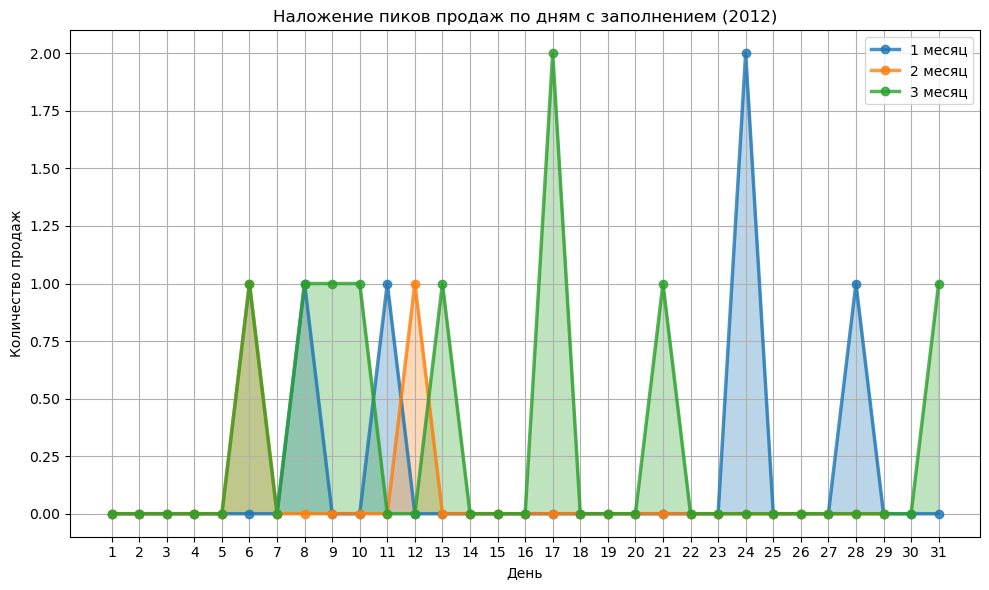

In [35]:
# Пропускаем данные через пайплайн
processed_data = sales_pipeline(dates_list, sales_list)

# Построение графика с наложением выбранных месяцев и заполнением
plot_sales_peaks_overlay_filled(year, months, processed_data)

### 6.  График частоты повторных покупок

In [37]:
# Преобразуем колонку даты в формат datetime, если это еще не сделано
data['date'] = pd.to_datetime(data['date'])

# Получаем необходимые списки
dates_list = data['date']
sales_list = data['cnt']

In [38]:
def repeat_purchase_pipeline(dates, sales):
    # Группируем данные по дате и считаем количество продаж за каждый день
    sales_by_date = sales.groupby(dates).sum()

    # Для расчета частоты повторных покупок используем среднее количество покупок по дням
    repeat_rate = sales_by_date.rolling(window=7).mean()

    return sales_by_date.index, repeat_rate

In [39]:
processed_dates, repeat_rate = repeat_purchase_pipeline(dates_list, sales_list)

### 6.1 Линейный график частоты повторных покупок

In [42]:
# Линейный график
def plot_repeat_purchase(dates, repeat_rate):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, repeat_rate, marker='o', linestyle='-', color='b')
    plt.fill_between(dates, repeat_rate, color='blue', alpha=0.1)  # Полупрозрачное заполнение
    plt.title('Частота повторных покупок (скользящее среднее за 7 дней)')
    plt.xlabel('Дата')
    plt.ylabel('Частота покупок (среднее количество)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

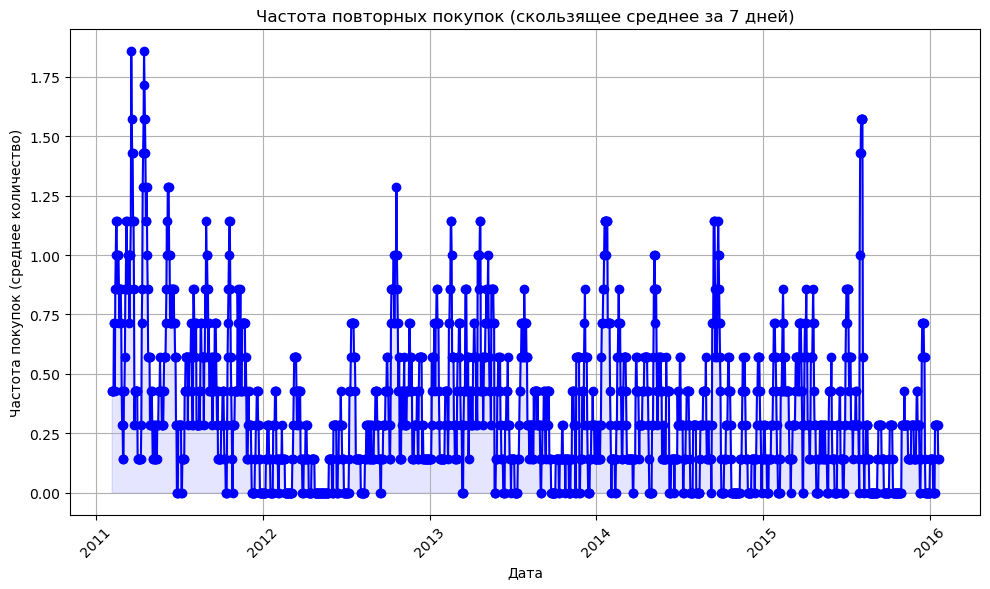

In [43]:
plot_repeat_purchase(processed_dates, repeat_rate)

### 6.2 Гистограмма частоты покупок

In [44]:
# Гистограмма
def plot_histogram(sales_list):
    plt.figure(figsize=(10, 6))
    plt.hist(sales_list, bins=20, color='green', edgecolor='black', alpha=0.7)
    plt.title('Распределение частоты покупок')
    plt.xlabel('Количество покупок')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

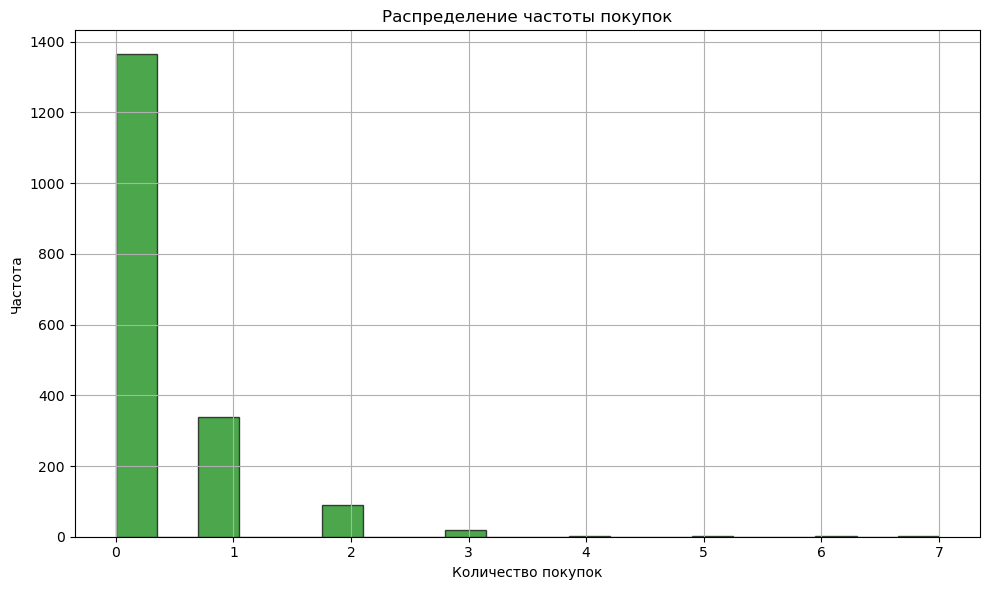

In [45]:
plot_histogram(sales_list)

### 6.3 Круговая диаграмма частоты покупок

In [46]:
# Круговая диаграмма
def plot_pie_chart(sales_list):
    sales_counts = sales_list.value_counts()
    labels = sales_counts.index
    sizes = sales_counts.values
    
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Процентное соотношение частоты покупок')
    plt.show()

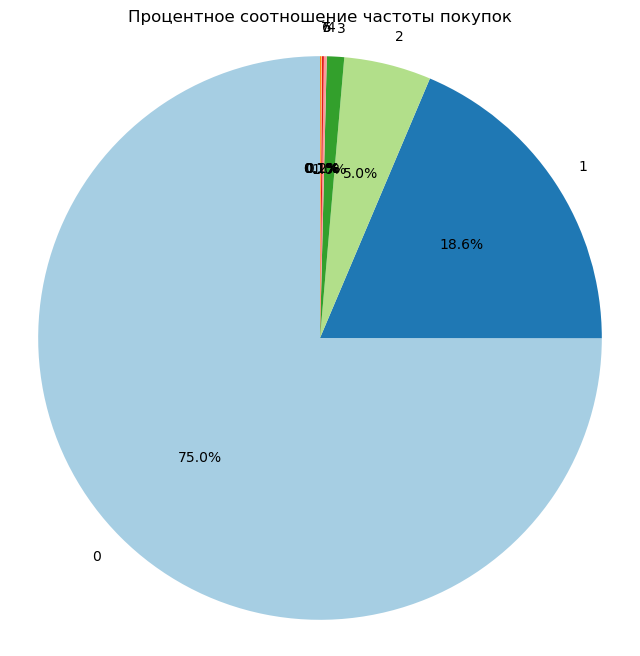

In [47]:
plot_pie_chart(sales_list)

In [238]:
from termcolor import colored

In [237]:
# pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [242]:
print(colored("ЭТО ДЛЯ МАРИНЫ (без атрибутов)", "black", "on_red" ))
print(colored("ЭТО ДЛЯ МАРИНЫ (без атрибутов)", "black", "on_red" ))
print(colored("ЭТО ДЛЯ МАРИНЫ  (без атрибутов)", "black", "on_red" ))
print(colored("ЭТО ДЛЯ МАРИНЫ  (без атрибутов)", "black", "on_red" ))
print(colored("ЭТО ДЛЯ МАРИНЫ (без атрибутов)", "black", "on_red" ))
print(colored("ЭТО ДЛЯ МАРИНЫ (без атрибутов)", "black", "on_red" ))
print(colored("ЭТО ДЛЯ МАРИНЫ  (без атрибутов)", "black", "on_red" ))
print(colored("ЭТО ДЛЯ МАРИНЫ  (без атрибутов)", "black", "on_red" ))

ЭТО ДЛЯ МАРИНЫ (без атрибутов)
ЭТО ДЛЯ МАРИНЫ (без атрибутов)
ЭТО ДЛЯ МАРИНЫ  (без атрибутов)
ЭТО ДЛЯ МАРИНЫ  (без атрибутов)
ЭТО ДЛЯ МАРИНЫ (без атрибутов)
ЭТО ДЛЯ МАРИНЫ (без атрибутов)
ЭТО ДЛЯ МАРИНЫ  (без атрибутов)
ЭТО ДЛЯ МАРИНЫ  (без атрибутов)


## 1. Анализ продаж по товарам и магазинам

### 1.1 Топ продаваемых товаров в каждом магазине (в моём набор данных только 1 магазин)

In [55]:
def top_items_pipeline(data, top_n=5):
    # Агрегируем данные по магазинам и товарам, суммируя количество проданных товаров
    sales_summary = data.groupby(['store_id', 'item_id'])['cnt'].sum().reset_index()
    
    # Для каждого магазина выбираем топ N товаров
    top_items = sales_summary.groupby('store_id', group_keys=False).apply(lambda x: x.nlargest(top_n, 'cnt')).reset_index(drop=True)
    
    return top_items


In [56]:
# Функция для построения графиков
def plot_top_items(top_items):
    stores = top_items['store_id'].unique()
    
    # Строим отдельный график для каждого магазина
    fig, axes = plt.subplots(nrows=len(stores), ncols=1, figsize=(10, 5 * len(stores)), constrained_layout=True)
    
    if len(stores) == 1:
        axes = [axes]
    
    # Строим графики для каждого магазина
    for i, store in enumerate(stores):
        store_data = top_items[top_items['store_id'] == store]
        axes[i].bar(store_data['item_id'], store_data['cnt'], color='skyblue')
        axes[i].set_title(f'Top selling items in store {store}')
        axes[i].set_xlabel('Item ID')
        axes[i].set_ylabel('Total Sold')
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.show()

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_19992\2441784782.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_items = sales_summary.groupby('store_id', group_keys=False).apply(lambda x: x.nlargest(top_n, 'cnt')).reset_index(drop=True)


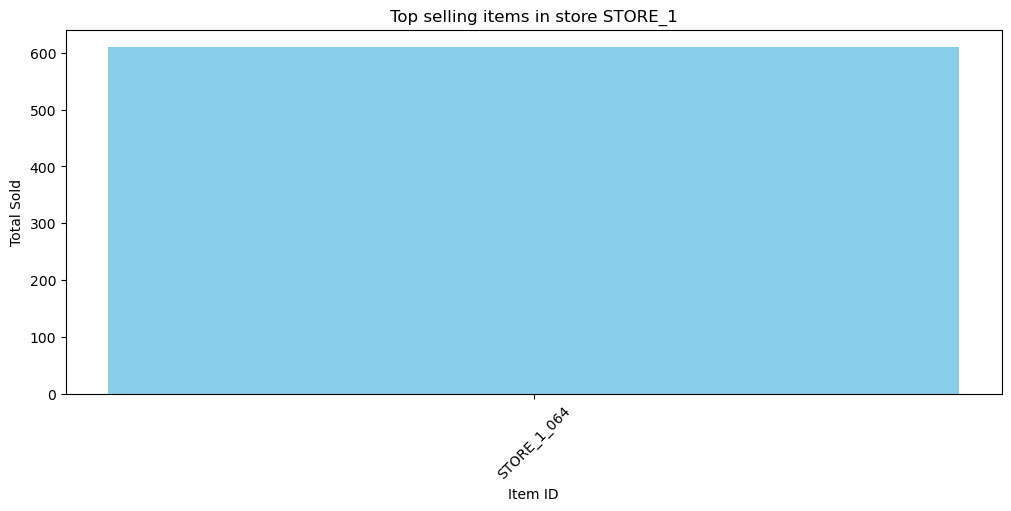

In [57]:
# Подготавливаем данные для пайплайна
top_items = top_items_pipeline(data)

# Строим график
plot_top_items(top_items)

In [59]:
unique_store_ids = data['store_id'].unique()
unique_store_ids

array(['STORE_1'], dtype=object)

### 1.2 Сравнение продаж одного товара в разных магазинах (у меня 1 магаз)

### 1.3 Выявление сезонности и трендов продаж по товарам (нужно будет фичи смотреть)

In [78]:
# Пайплайн для фильтрации и анализа продаж
def sales_pipeline(dates_list, sales_list, start_date, end_date):
    """
    Фильтрует данные по диапазону дат и группирует их для анализа.
    """
    # Создаем DataFrame из списков
    data = pd.DataFrame({'Date': dates_list, 'Sales': sales_list})
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Фильтрация данных по диапазону дат
    filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    
    # Группировка по месяцам и неделям
    monthly_sales = filtered_data.resample('M', on='Date').sum()
    weekly_sales = filtered_data.resample('W', on='Date').sum()
    
    return monthly_sales, weekly_sales

In [79]:
# Функция для построения графиков
def plot_sales_trends(monthly_sales, weekly_sales):
    """
    Построение графиков трендов и сезонности.
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    # График сезонности (по месяцам)
    ax1.plot(monthly_sales.index, monthly_sales['Sales'], marker='o', linestyle='-', color='b')
    ax1.set_title('Тренды продаж по месяцам (сезонность)')
    ax1.set_xlabel('Месяц')
    ax1.set_ylabel('Продажи')
    ax1.set_xticks(monthly_sales.index)
    ax1.set_xticklabels([date.strftime('%b') for date in monthly_sales.index], rotation=45)  # Подписи для месяцев
    ax1.grid(True)

    # График трендов (по неделям)
    ax2.plot(weekly_sales.index, weekly_sales['Sales'], marker='o', linestyle='-', color='g')
    ax2.set_title('Тренды продаж по неделям')
    ax2.set_xlabel('Недели')
    ax2.set_ylabel('Продажи')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

In [80]:
# Загрузка данных и подготовка списков
def load_and_prepare_data(filepath):
    """
    Загружает и подготавливает данные для анализа.
    """
    # Загрузка данных из CSV файла
    sales_data = pd.read_csv(filepath)
    
    # Преобразуем данные в списки для пайплайна
    dates_list = sales_data['Date'].to_list()
    sales_list = sales_data['Sales'].to_list()
    
    return dates_list, sales_list

In [83]:
# Главная функция для работы с пользователем
def main():
    # Запрос у пользователя диапазона дат
    start_date = input('Введите начальную дату в формате YYYY-MM-DD: ')
    end_date = input('Введите конечную дату в формате YYYY-MM-DD: ')
    
    # Запуск пайплайна для фильтрации и группировки данных
    monthly_sales, weekly_sales = sales_pipeline(dates_list, sales_list, start_date, end_date)
    
    # Построение графиков
    plot_sales_trends(monthly_sales, weekly_sales)

Введите начальную дату в формате YYYY-MM-DD:  2011-01-01
Введите конечную дату в формате YYYY-MM-DD:  2012-01-01


C:\Users\Anastasia\AppData\Local\Temp\ipykernel_19992\622770881.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = filtered_data.resample('M', on='Date').sum()


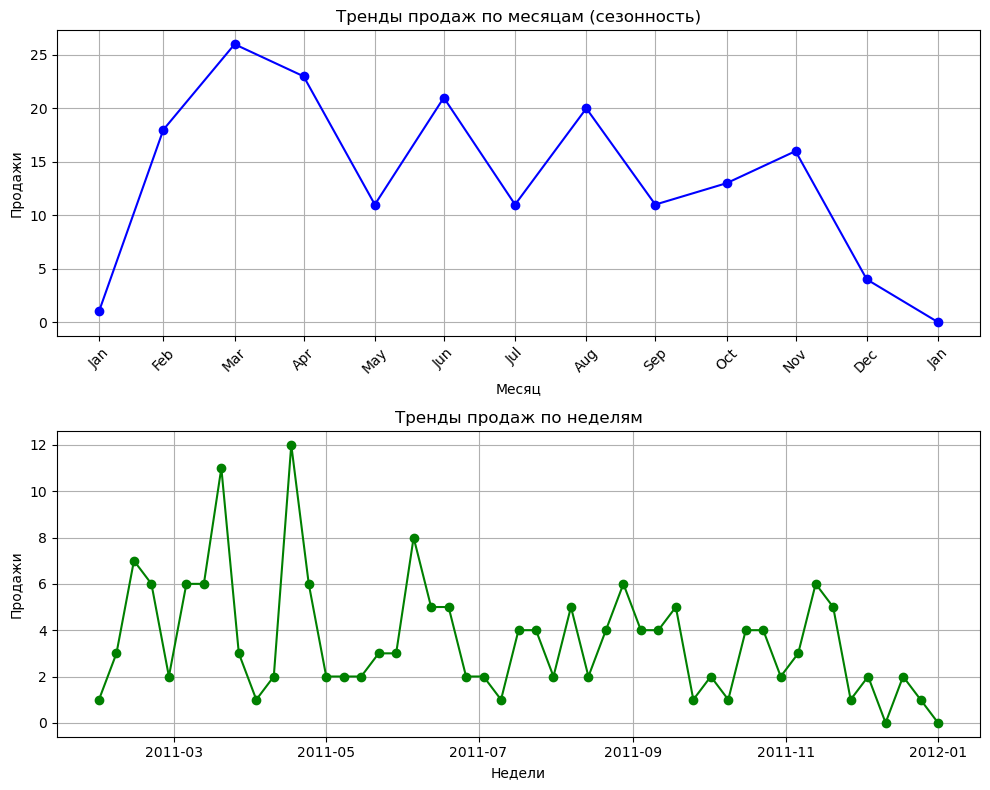

In [84]:
main()

### 1.4 Выручка (по 1 товару) за каждый день

In [191]:
# Функция пайплайна пайплайна для построения выручки по дням
def revenue_pipeline(dates, sales):
    # Группировка по дате для суммирования продаж
    sales_data = pd.DataFrame({'Date': pd.to_datetime(dates), 'Sales': sales})
    resampled_data = sales_data.groupby('Date').sum()
    return resampled_data.index, resampled_data['Sales']

In [193]:
# Подготовка данных для графика
processed_dates, daily_sales = revenue_pipeline(dates_list, sales_list)

In [194]:
# Переопределим функцию пайплайна для построения выручки по дням
def revenue_pipeline(dates, sales):
    sales_data = pd.DataFrame({'Date': dates, 'Sales': sales})
    resampled_data = sales_data.groupby('Date').sum()
    return resampled_data.index, resampled_data['Sales']

In [195]:
# Подготовка данных для графика
processed_dates, daily_sales = revenue_pipeline(dates_list, sales_list)

In [196]:
def get_user_period():
    # Запрос периода у пользователя
    start_date = input("Введите начальную дату в формате YYYY-MM-DD: ")
    end_date = input("Введите конечную дату в формате YYYY-MM-DD: ")
    
    # Преобразуем в формат даты
    start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
    end_date = pd.to_datetime(end_date, format='%Y-%m-%d')
    
    return start_date, end_date

In [197]:
# Повторный запрос периода у пользователя
start_date, end_date = get_user_period()

Введите начальную дату в формате YYYY-MM-DD:  2011-01-30
Введите конечную дату в формате YYYY-MM-DD:  2011-02-15


In [198]:
# Фильтруем данные по выбранному периоду
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

In [199]:
# Преобразуем данные продаж в числовой формат
filtered_data['cnt'] = pd.to_numeric(filtered_data['cnt'], errors='coerce')
filtered_data = filtered_data.dropna(subset=['cnt'])  # Удалим строки с некорректными значениями

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_19992\1624901983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cnt'] = pd.to_numeric(filtered_data['cnt'], errors='coerce')


In [200]:
# Повторная подготовка данных для графика
filtered_dates = filtered_data['date']
filtered_sales = filtered_data['cnt']

In [201]:
processed_dates, daily_sales = revenue_pipeline(filtered_dates, filtered_sales)

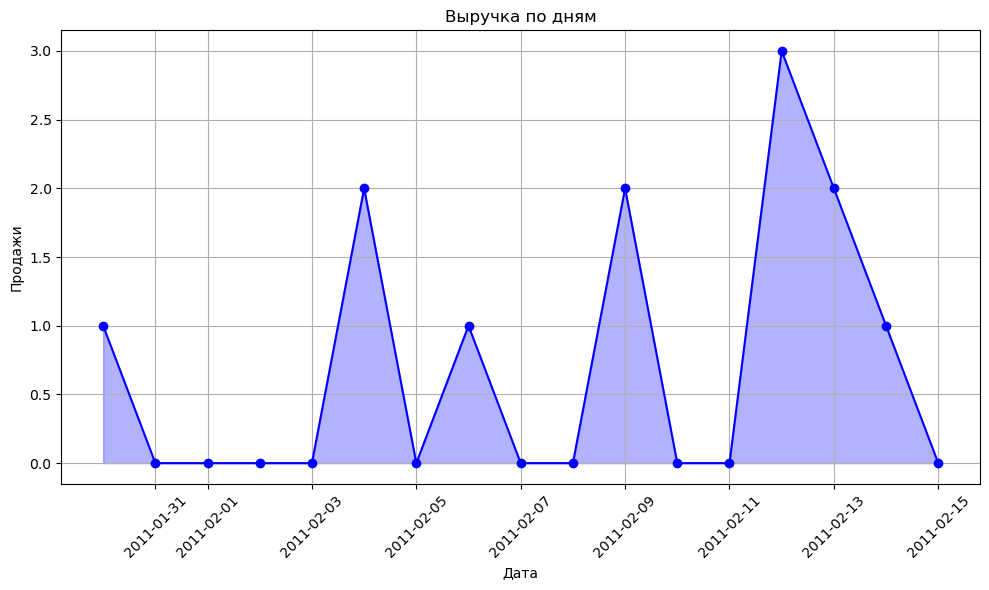

In [202]:
plot_revenue_by_day(processed_dates, daily_sales)

### 1.5 Выручка магазина за каждый день (у меня пока 1 магаз)

## 2. Анализ продаж по дням недели и месяцам

### 2.1 Определение дней с наибоьшими продажами

In [226]:
# Функция для агрегации и подсчета продаж по дням
def sales_pipeline(dates, sales):
    # Преобразуем даты в формат datetime и группируем данные
    sales_data = pd.DataFrame({'Date': pd.to_datetime(dates), 'Sales': sales})
    # Группируем по дням
    daily_sales = sales_data.groupby('Date').sum()
    return daily_sales.index, daily_sales['Sales']

In [227]:
# Функция для получения от пользователя периода дат и количества топ-дней
def get_user_input():
    start_date = input("Введите начальную дату в формате YYYY-MM-DD: ")
    end_date = input("Введите конечную дату в формате YYYY-MM-DD: ")
    top_n = int(input("Введите количество топ дней, которые хотите отобразить: "))
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    return start_date, end_date, top_n

In [228]:
# Функция для построения графика с максимальными продажами
def plot_top_sales_days(dates, sales, top_n=5):
    plt.figure(figsize=(10, 6))
    
    # Находим дни с наибольшими продажами
    top_sales = sorted(zip(dates, sales), key=lambda x: x[1], reverse=True)[:top_n]
    
    # Разбиваем на отдельные списки для дат и значений продаж
    top_dates, top_sales_values = zip(*top_sales)
    
    # Строим график с жирными столбцами и сеткой
    plt.bar(top_dates, top_sales_values, color='green', alpha=0.7, width=0.5, edgecolor='black', linewidth=2)
    
    # Добавляем подписи над столбцами и даты под ними
    for i, (date, value) in enumerate(zip(top_dates, top_sales_values)):
        plt.text(date, value, f'{value:.1f}', ha='center', va='bottom', fontsize=10)
        plt.text(date, -0.5, f'{date.strftime("%Y-%m-%d")}', ha='center', va='top', fontsize=9, rotation=45)

    # Добавляем подписи осей, сетку и заголовок
    plt.ylabel('Продажи')
    plt.xlabel('Дата')
    plt.grid(True)
    plt.title(f'Топ {top_n} дней с наибольшими продажами')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Выводим результат в виде списка с датами и продажами
    print("\nТоп дней с наибольшими продажами:")
    for date, value in zip(top_dates, top_sales_values):
        print(f"Дата: {date.strftime('%Y-%m-%d')}, Продажи: {value:.1f}")

In [229]:
# Основной пайплайн для обработки данных
def main(dates_list, sales_list):
    # Запрашиваем период и количество топ-дней от пользователя
    start_date, end_date, top_n = get_user_input()
    
    # Фильтруем данные по указанному периоду
    filtered_dates = [date for date in dates_list if start_date <= pd.to_datetime(date) <= end_date]
    filtered_sales = [sales for date, sales in zip(dates_list, sales_list) if start_date <= pd.to_datetime(date) <= end_date]
    
    # Агрегируем и считаем продажи по дням
    processed_dates, daily_sales = sales_pipeline(filtered_dates, filtered_sales)
    
    # Построение графика дней с наибольшими продажами
    plot_top_sales_days(processed_dates, daily_sales, top_n)

Введите начальную дату в формате YYYY-MM-DD:  2011-01-01
Введите конечную дату в формате YYYY-MM-DD:  2016-01-01
Введите количество топ дней, которые хотите отобразить:  10


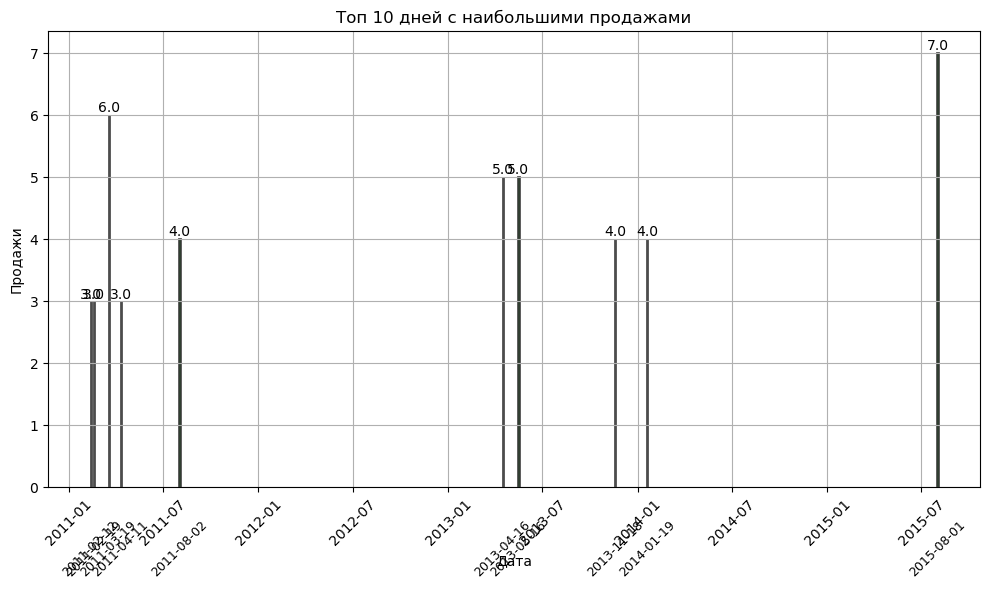


Топ дней с наибольшими продажами:
Дата: 2015-08-01, Продажи: 7.0
Дата: 2011-03-19, Продажи: 6.0
Дата: 2013-04-16, Продажи: 5.0
Дата: 2013-05-16, Продажи: 5.0
Дата: 2011-08-02, Продажи: 4.0
Дата: 2013-11-18, Продажи: 4.0
Дата: 2014-01-19, Продажи: 4.0
Дата: 2011-02-12, Продажи: 3.0
Дата: 2011-02-19, Продажи: 3.0
Дата: 2011-04-11, Продажи: 3.0


In [230]:
main(dates_list, sales_list)

### 2.3 Выявление различия в продажах между будними и выходными днями

In [231]:
# Функция для определения будний это день или выходной
def is_weekend(date):
    return date.weekday() >= 5  # 5 и 6 это суббота и воскресенье

In [232]:
# Пайплайн для обработки данных и получения продаж для будних и выходных дней
def sales_weekday_weekend_pipeline(dates_list, sales_list):
    # Преобразуем список дат в формат datetime
    dates = pd.to_datetime(dates_list)
    
    # Определяем тип дня (будний/выходной)
    weekdays_sales = [sales for date, sales in zip(dates, sales_list) if not is_weekend(date)]
    weekends_sales = [sales for date, sales in zip(dates, sales_list) if is_weekend(date)]
    
    # Подсчитываем общее количество продаж для будних и выходных дней
    total_weekday_sales = sum(weekdays_sales)
    total_weekend_sales = sum(weekends_sales)
    
    return total_weekday_sales, total_weekend_sales

In [233]:
# Функция для построения графика
def plot_weekday_weekend_sales(weekday_sales, weekend_sales):
    labels = ['Будни', 'Выходные']
    sales_values = [weekday_sales, weekend_sales]
    
    plt.figure(figsize=(8, 6))
    plt.bar(labels, sales_values, color=['blue', 'orange'])
    plt.title('Сравнение продаж между будними и выходными днями')
    plt.ylabel('Объем продаж')
    plt.grid(True)
    plt.show()

In [234]:
# Основной контроллер для обработки данных и построения графика
def main_controller(dates_list, sales_list):
    # Запрашиваем у пользователя диапазон дат (если нужно)
    start_date, end_date = get_user_period()
    
    # Фильтруем данные по выбранному диапазону
    filtered_dates = [date for date in dates_list if start_date <= pd.to_datetime(date) <= end_date]
    filtered_sales = [sale for date, sale in zip(dates_list, sales_list) if start_date <= pd.to_datetime(date) <= end_date]
    
    # Получаем продажи для будних и выходных
    weekday_sales, weekend_sales = sales_weekday_weekend_pipeline(filtered_dates, filtered_sales)
    
    # Строим график
    plot_weekday_weekend_sales(weekday_sales, weekend_sales)

Введите начальную дату в формате YYYY-MM-DD:  2011-01-01
Введите конечную дату в формате YYYY-MM-DD:  2016-01-01


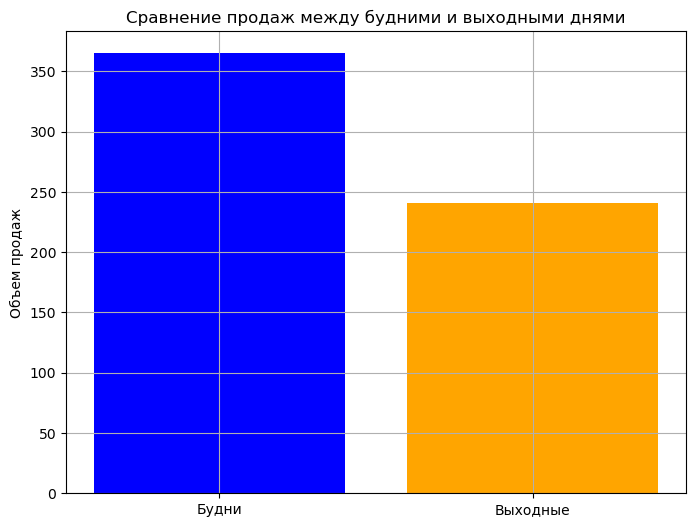

In [235]:
main_controller(dates_list, sales_list)

### 2.3 Изучение влияния месяца на продажи

In [244]:
# Пайплайн для обработки данных и группировки продаж по месяцам
def sales_by_month_pipeline(dates_list, sales_list):
    # Преобразуем список дат в формат datetime
    dates = pd.to_datetime(dates_list)
    
    # Создаем DataFrame для обработки
    data = pd.DataFrame({'Date': dates, 'Sales': sales_list})
    
    # Извлекаем месяц из даты
    data['Month'] = data['Date'].dt.month
    
    # Группируем данные по месяцам и суммируем продажи
    monthly_sales = data.groupby('Month')['Sales'].sum()
    
    return monthly_sales

In [245]:
# Функция для построения графика влияния месяца на продажи
def plot_sales_by_month(monthly_sales):
    # Массив с названиями месяцев
    months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
    
    plt.figure(figsize=(10, 6))
    plt.bar(months, monthly_sales, color='skyblue')
    plt.title('Влияние месяца на продажи')
    plt.xlabel('Месяц')
    plt.ylabel('Объем продаж')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [246]:
# Основной контроллер для обработки данных и построения графика
def main_controller(dates_list, sales_list):
    # Запрашиваем у пользователя диапазон дат (если нужно)
    start_date, end_date = get_user_period()
    
    # Фильтруем данные по выбранному диапазону
    filtered_dates = [date for date in dates_list if start_date <= pd.to_datetime(date) <= end_date]
    filtered_sales = [sale for date, sale in zip(dates_list, sales_list) if start_date <= pd.to_datetime(date) <= end_date]
    
    # Получаем продажи по месяцам
    monthly_sales = sales_by_month_pipeline(filtered_dates, filtered_sales)
    
    # Строим график
    plot_sales_by_month(monthly_sales)

Введите начальную дату в формате YYYY-MM-DD:  2011-01-01
Введите конечную дату в формате YYYY-MM-DD:  2013-01-01


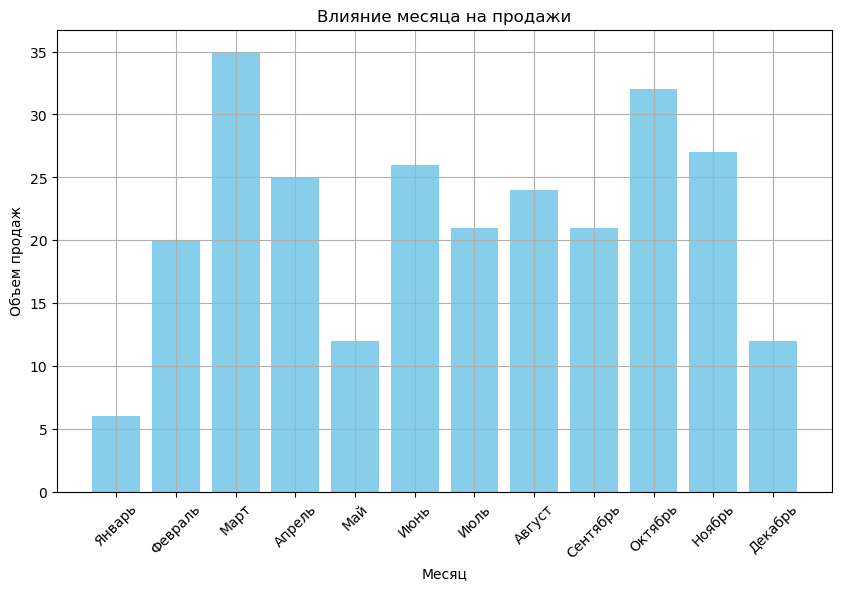

In [247]:
main_controller(dates_list, sales_list)

## 3. Анализ влияния событий и акций

### 3.1 Оценка влияния различных событий (праздники, рапродажи) на продажи

In [266]:
# Функция для фильтрации данных по событиям и анализу влияния
def event_sales_pipeline(data, event_window=3):
    # Преобразуем колонки даты и продаж в формат datetime и float
    data['date'] = pd.to_datetime(data['date'])
    
    # Отфильтруем строки с не пустыми событиями
    event_data = data.dropna(subset=['event_name_1', 'event_type_1'])
    
    # Праздничные дни и несколько дней до/после
    event_sales = pd.DataFrame()

    # Обрабатываем каждое событие
    for i, row in event_data.iterrows():
        event_date = row['date']
        event_name = row['event_name_1']
        event_type = row['event_type_1']

        # Фильтруем продажи на несколько дней до и после события
        mask = (data['date'] >= event_date - pd.Timedelta(days=event_window)) & \
               (data['date'] <= event_date + pd.Timedelta(days=event_window))
        
        filtered_sales = data[mask].copy()
        filtered_sales['event'] = event_name
        filtered_sales['event_type'] = event_type

        event_sales = pd.concat([event_sales, filtered_sales])
    
    return event_sales

In [267]:
# Подготовка данных
sales_data = pd.read_csv('item_064.csv')  # Загрузка ваших данных
event_sales = event_sales_pipeline(sales_data)

In [272]:
# Функция для построения графика по событиям
def plot_event_sales(event_sales):
    plt.figure(figsize=(12, 8))
    
    # Для каждого типа события рисуем продажи
    for event in event_sales['event'].unique():
        event_sales_data = event_sales[event_sales['event'] == event]
        plt.plot(event_sales_data['date'], event_sales_data['cnt'], marker='o', label=f"Событие: {event}")
        
        # Выделяем день самого события
        event_date = event_sales_data[event_sales_data['date'] == event_sales_data['event'].iloc[0]]['date'].iloc[0]
        plt.axvline(event_date, color='red', linestyle='--', label=f'Праздник {event}')
    
    plt.title('Продажи в дни событий и несколько дней до/после')
    plt.xlabel('Дата')
    plt.ylabel('Продажи')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


IndexError: single positional indexer is out-of-bounds

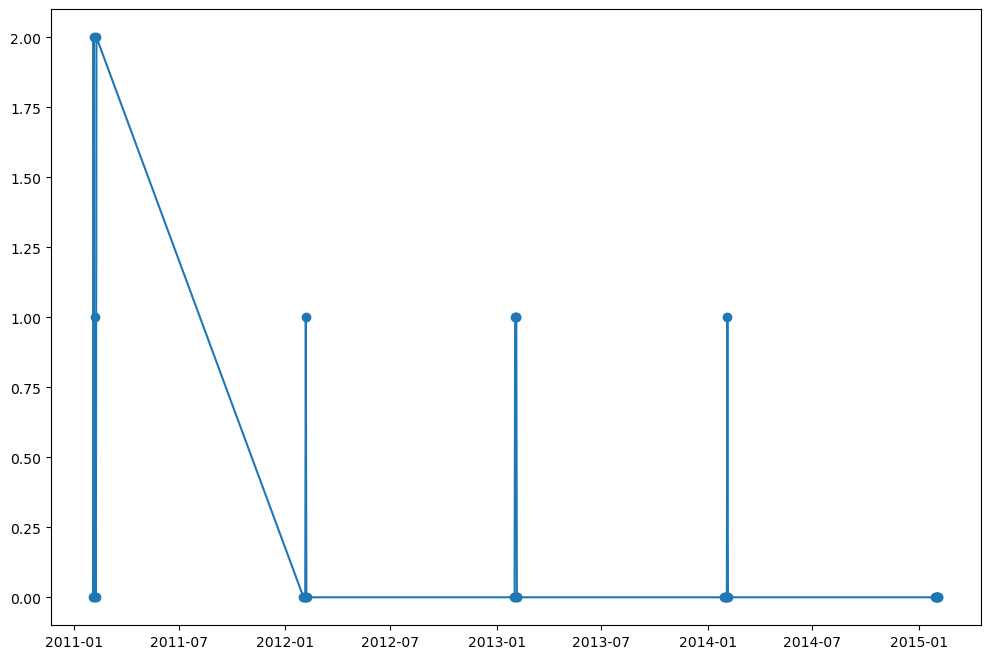

In [273]:
plot_event_sales(event_sales)